In [16]:
import pandas as pd
import pyreadstat
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
# Path to extracted CSV
path = r"C:\Users\018464615\Downloads\SEM1\CMPE-255\Project\LLCP2024XPT\LLCP2024_raw.csv"

In [2]:
# df = pd.read_csv(path, nrows=50000) #First 50k rows
df_OG = pd.read_csv(path)

print(df_OG.shape)
df_OG.head()

(457670, 301)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_LCSCTSN,_LCSPSTF,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK3,_RFDRHV9,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,2.0,2282024,2.0,28.0,2024,1100.0,2024000001,2.024000e+09,1.0,...,NaN,9.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
1,1.0,2.0,2212024,2.0,21.0,2024,1100.0,2024000002,2.024000e+09,1.0,...,4.0,9.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
2,1.0,2.0,2212024,2.0,21.0,2024,1100.0,2024000003,2.024000e+09,1.0,...,4.0,2.0,1.0,100.0,2.0,1400.0,1.0,NaN,NaN,2.0
3,1.0,2.0,2282024,2.0,28.0,2024,1100.0,2024000004,2.024000e+09,1.0,...,NaN,9.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
4,1.0,2.0,2212024,2.0,21.0,2024,1100.0,2024000005,2.024000e+09,1.0,...,3.0,9.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,2.0


In [3]:
# 1100	Completed Interview
# Filter to only completed interviews
df_complete = df_OG[df_OG['DISPCODE'] == 1100]

# Check how much data remains
print("Rows before filtering:", len(df_OG))
print("Rows after filtering:", len(df_complete))
print("Percentage kept:", len(df_complete) / len(df_OG) * 100, "%")

Rows before filtering: 457670
Rows after filtering: 372224
Percentage kept: 81.33021609456596 %


In [4]:
# List of variables to keep
keep_vars = [
    "HADHYST2", "HADMAM", "_RACEPRV", "_AGE_G", "_AIDTST4", "_BMI5", "_CHLDCNT", "_DRDXAR2",
    "_EDUCAG", "_EXTETH3", "_FLSHOT7", "_HPV5YR1", "_INCOMG1", "_LCSSMKG", "_LCSYQTS",
    "_LCSYSMK", "_LTASTH1", "_MENT14D", "_MICHD", "_PACKDAY", "_PAPHPV1", "_PHYS14D",
    "_PNEUMO3", "_RFBING6", "_RFBMI5", "_RFDRHV9", "_RFHLTH", "_RFMAM23", "_RFSMOK3",
    "_SEX", "_TOTINDA", "HTIN4", "LCSNUMC_", "WTKG3", "CSRVDOC1", "CSRVCTL2", "CNCRAGE",
    "CNCRTYP2", "CRGVREL5", "CADULT1", "HHADULT", "ADDEPEV3", "ASTHMA3", "ASTHNOW",
    "CHCCOPD3", "CHCKDNY2", "CHCOCNC1", "CHCSCNC1", "CVDCRHD4", "CVDINFR4", "CVDSTRK3",
    "DIABAGE4", "DIABETE4", "CIMEMLO1", "COLNCNCR", "HADSIGM4", "EMPLOY1",
    "MARITAL", "PREGNANT", "WEIGHT2", "BLIND", "DEAF", "DECIDE", "DIFFALON", "DIFFDRES",
    "DIFFWALK", "CHECKUP1", "PERSDOC3", "PRIMINS2", "GENHLTH", "MENTHLTH", "PHYSHLTH",
    "POORHLTH", "NUMADULT", "LCSCTSC1", "LCSNUMCG", "QSTLANG", "DISPCODE", "EMTSUPRT",
    "FOODSTMP", "LSATISFY", "SDHFOOD1", "SSBFRUT3", "SSBSUGR2", "TETANUS1", "SMOKDAY2",
    "SMOKE100", "USENOW3", "_METSTAT", "_URBSTAT", "_IMPRACE"
]

In [5]:
# Subset to only the selected variables
df = df_complete[keep_vars]

# Check shape and preview
print("Shape of filtered data:", df.shape)
print(df.head())

Shape of filtered data: (372224, 91)
   HADHYST2  HADMAM  _RACEPRV  _AGE_G  _AIDTST4   _BMI5  _CHLDCNT  _DRDXAR2  \
0       1.0     1.0       1.0     6.0       2.0  2249.0       1.0       1.0   
1       NaN     NaN       1.0     6.0       2.0  2583.0       1.0       1.0   
2       NaN     NaN       1.0     5.0       2.0  2253.0       1.0       1.0   
3       NaN     NaN       1.0     6.0       2.0  2509.0       1.0       1.0   
4       NaN     NaN       1.0     4.0       2.0  1977.0       1.0       2.0   

   _EDUCAG  _EXTETH3  ...  SDHFOOD1  SSBFRUT3  SSBSUGR2  TETANUS1  SMOKDAY2  \
0      2.0       2.0  ...       5.0       NaN       NaN       NaN       NaN   
1      4.0       2.0  ...       5.0       NaN       NaN       NaN       3.0   
2      3.0       2.0  ...       5.0       NaN       NaN       NaN       1.0   
3      4.0       1.0  ...       5.0       NaN       NaN       NaN       NaN   
4      3.0       2.0  ...       5.0       NaN       NaN       NaN       NaN   

   SMOKE100  

In [6]:
# Count missing (empty) values for each column
missing_counts = df.isna().sum().sort_values(ascending=False)

# Show the result
print(missing_counts)

# (Optional) If you also want the percentage of missing values:
missing_percent = (df.isna().mean() * 100).sort_values(ascending=False)

# Combine both counts and percentages in one DataFrame for clarity
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent.round(2)
})
pd.set_option('display.max_rows', None)

print("\n=== Missing Value Summary ===")
print(missing_summary)

CSRVCTL2    371685
CSRVDOC1    368864
TETANUS1    361810
CNCRAGE     358714
CNCRTYP2    358714
             ...  
DISPCODE         0
QSTLANG          0
SMOKE100         0
USENOW3          0
_IMPRACE         0
Length: 91, dtype: int64

=== Missing Value Summary ===
          Missing_Count  Missing_Percent
CSRVCTL2         371685            99.86
CSRVDOC1         368864            99.10
TETANUS1         361810            97.20
CNCRAGE          358714            96.37
CNCRTYP2         358714            96.37
CRGVREL5         352318            94.65
DIABAGE4         317238            85.23
ASTHNOW          313073            84.11
_HPV5YR1         311803            83.77
PREGNANT         307427            82.59
NUMADULT         301696            81.05
CIMEMLO1         296187            79.57
_PAPHPV1         293297            78.80
_LCSYQTS         264714            71.12
SSBFRUT3         261801            70.33
SSBSUGR2         261801            70.33
_LCSYSMK         237679            63.

In [7]:
# Variables with more than 40% missing data
remove_vars = [
    "CSRVCTL2", "CSRVDOC1", "TETANUS1", "CNCRAGE", "CRGVREL5", "ASTHNOW",
    "_HPV5YR1", "NUMADULT", "CIMEMLO1", "_PAPHPV1", "_LCSYQTS", "SSBFRUT3",
    "SSBSUGR2", "_LCSYSMK", "_PACKDAY", "LCSNUMC_", "LCSNUMCG",
    "_FLSHOT7", "_PNEUMO3", "POORHLTH"
]

In [8]:
# Drop the high-missing columns
df_cleaned = df.drop(columns=remove_vars)

print("Shape before:", df.shape)
print("Shape after:", df_cleaned.shape)

# Confirm removed variables are not in the DataFrame anymore
print(set(remove_vars) - set(df_cleaned.columns))

# ✅ Compute missing counts & percentages WITHOUT overwriting df_cleaned
missing_counts = df_cleaned.isna().sum().sort_values(ascending=False)
missing_percent = (df_cleaned.isna().mean() * 100).sort_values(ascending=False)

# Combine into one summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent.round(2)
})

# Show all rows
pd.set_option('display.max_rows', None)

print("\n=== Missing Value Summary ===")
print(missing_summary)


Shape before: (372224, 91)
Shape after: (372224, 71)
{'CRGVREL5', '_HPV5YR1', 'POORHLTH', '_PACKDAY', 'LCSNUMCG', 'SSBFRUT3', '_PAPHPV1', '_FLSHOT7', 'CIMEMLO1', '_PNEUMO3', 'LCSNUMC_', 'CSRVDOC1', 'ASTHNOW', 'CSRVCTL2', '_LCSYQTS', 'NUMADULT', 'SSBSUGR2', 'CNCRAGE', 'TETANUS1', '_LCSYSMK'}

=== Missing Value Summary ===
          Missing_Count  Missing_Percent
CNCRTYP2         358714            96.37
DIABAGE4         317238            85.23
PREGNANT         307427            82.59
SMOKDAY2         226972            60.98
_RFMAM23         214762            57.70
EMTSUPRT         178443            47.94
LSATISFY         178443            47.94
SDHFOOD1         178443            47.94
FOODSTMP         178443            47.94
HADHYST2         177959            47.81
HADMAM           175977            47.28
COLNCNCR         106939            28.73
HADSIGM4         106767            28.68
HHADULT           70720            19.00
CADULT1           70537            18.95
_BMI5             218

In [9]:
#NOW we just take diabetic and non diabetic
# Next we can take Diabetic, pre and non diabetic
# or Just Diabetic and not diabetic
# Just taking Diabetic and not diabetic

In [10]:
# Drop rows where DIABETE4 is 7, 9, or missing/blank
df_cleaned = df_cleaned[~df_cleaned['DIABETE4'].isin([7, 9])]
df_cleaned = df_cleaned.dropna(subset=['DIABETE4'])

# Check remaining unique values
print("Remaining DIABETE4 values:", df_cleaned['DIABETE4'].unique())

# Optional: see counts
print(df_cleaned['DIABETE4'].value_counts())
print("Rows right now:", len(df_cleaned))

Remaining DIABETE4 values: [3. 1. 4. 2.]
DIABETE4
3.0    304192
1.0     54986
4.0      9536
2.0      2741
Name: count, dtype: int64
Rows right now: 371455


In [11]:
# Recode DIABETE4: 1 -> 1 (Yes), 2/3/4 -> 0 (No)
df_cleaned['DIABETE4'] = df_cleaned['DIABETE4'].replace({2: 0, 3: 0, 4: 0, 1: 1})

# Confirm mapping
print(df_cleaned['DIABETE4'].value_counts())

DIABETE4
0.0    316469
1.0     54986
Name: count, dtype: int64


In [12]:
print("Rows right now:", len(df_cleaned))

Rows right now: 371455


In [13]:
cols = df_cleaned.columns.tolist()
print(cols)

missing_counts = df_cleaned.isna().sum().sort_values(ascending=False)
missing_percent = (df_cleaned.isna().mean() * 100).sort_values(ascending=False)

# Combine into one summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent.round(2)
})

# Show all rows
pd.set_option('display.max_rows', None)

print("\n=== Missing Value Summary ===")
print(missing_summary)
print("Rows right now:", len(df_cleaned))

['HADHYST2', 'HADMAM', '_RACEPRV', '_AGE_G', '_AIDTST4', '_BMI5', '_CHLDCNT', '_DRDXAR2', '_EDUCAG', '_EXTETH3', '_INCOMG1', '_LCSSMKG', '_LTASTH1', '_MENT14D', '_MICHD', '_PHYS14D', '_RFBING6', '_RFBMI5', '_RFDRHV9', '_RFHLTH', '_RFMAM23', '_RFSMOK3', '_SEX', '_TOTINDA', 'HTIN4', 'WTKG3', 'CNCRTYP2', 'CADULT1', 'HHADULT', 'ADDEPEV3', 'ASTHMA3', 'CHCCOPD3', 'CHCKDNY2', 'CHCOCNC1', 'CHCSCNC1', 'CVDCRHD4', 'CVDINFR4', 'CVDSTRK3', 'DIABAGE4', 'DIABETE4', 'COLNCNCR', 'HADSIGM4', 'EMPLOY1', 'MARITAL', 'PREGNANT', 'WEIGHT2', 'BLIND', 'DEAF', 'DECIDE', 'DIFFALON', 'DIFFDRES', 'DIFFWALK', 'CHECKUP1', 'PERSDOC3', 'PRIMINS2', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'LCSCTSC1', 'QSTLANG', 'DISPCODE', 'EMTSUPRT', 'FOODSTMP', 'LSATISFY', 'SDHFOOD1', 'SMOKDAY2', 'SMOKE100', 'USENOW3', '_METSTAT', '_URBSTAT', '_IMPRACE']

=== Missing Value Summary ===
          Missing_Count  Missing_Percent
CNCRTYP2         357969            96.37
DIABAGE4         316469            85.20
PREGNANT         306777          

In [14]:
# --- Drop the column 'SMOKE100' without touching any rows ---
df_cleaned = df_cleaned.drop(columns=['SMOKE100'], errors='ignore')

# Confirm column removed but row count unchanged
print("'SMOKE100' column dropped (if it existed).")
print("Current number of rows:", len(df_cleaned))
print("Columns now include:", df_cleaned.columns[:10])
print("Rows right now:", len(df_cleaned))

'SMOKE100' column dropped (if it existed).
Current number of rows: 371455
Columns now include: Index(['HADHYST2', 'HADMAM', '_RACEPRV', '_AGE_G', '_AIDTST4', '_BMI5',
       '_CHLDCNT', '_DRDXAR2', '_EDUCAG', '_EXTETH3'],
      dtype='object')
Rows right now: 371455


In [15]:
# --- Drop the column 'SMOKDAY2' without affecting rows ---
df_cleaned = df_cleaned.drop(columns=['SMOKDAY2'], errors='ignore')

# Confirm
print("'SMOKDAY2' column dropped (if it existed).")
print("Current number of rows:", len(df_cleaned))
print("Rows right now:", len(df_cleaned))

'SMOKDAY2' column dropped (if it existed).
Current number of rows: 371455
Rows right now: 371455


In [17]:
print("Remaining distinct columns:", len(df_cleaned.columns))
print("Distinct column names:")
print(df_cleaned.columns.tolist())

Remaining distinct columns: 69
Distinct column names:
['HADHYST2', 'HADMAM', '_RACEPRV', '_AGE_G', '_AIDTST4', '_BMI5', '_CHLDCNT', '_DRDXAR2', '_EDUCAG', '_EXTETH3', '_INCOMG1', '_LCSSMKG', '_LTASTH1', '_MENT14D', '_MICHD', '_PHYS14D', '_RFBING6', '_RFBMI5', '_RFDRHV9', '_RFHLTH', '_RFMAM23', '_RFSMOK3', '_SEX', '_TOTINDA', 'HTIN4', 'WTKG3', 'CNCRTYP2', 'CADULT1', 'HHADULT', 'ADDEPEV3', 'ASTHMA3', 'CHCCOPD3', 'CHCKDNY2', 'CHCOCNC1', 'CHCSCNC1', 'CVDCRHD4', 'CVDINFR4', 'CVDSTRK3', 'DIABAGE4', 'DIABETE4', 'COLNCNCR', 'HADSIGM4', 'EMPLOY1', 'MARITAL', 'PREGNANT', 'WEIGHT2', 'BLIND', 'DEAF', 'DECIDE', 'DIFFALON', 'DIFFDRES', 'DIFFWALK', 'CHECKUP1', 'PERSDOC3', 'PRIMINS2', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'LCSCTSC1', 'QSTLANG', 'DISPCODE', 'EMTSUPRT', 'FOODSTMP', 'LSATISFY', 'SDHFOOD1', 'USENOW3', '_METSTAT', '_URBSTAT', '_IMPRACE']


=== Chi-square Test: Marital Status vs Diabetes ===
MARITAL      1.0    2.0    3.0   4.0    5.0    6.0
diab_bin                                          
0.0       196673  48041  37796  7782  76799  20087
1.0        32405  10666  11241  1641   7803   1615

Chi2 = 6322.56, p-value = 0.000e+00, Cramer's V = 0.118
→ Statistically significant association between marital status and diabetes.


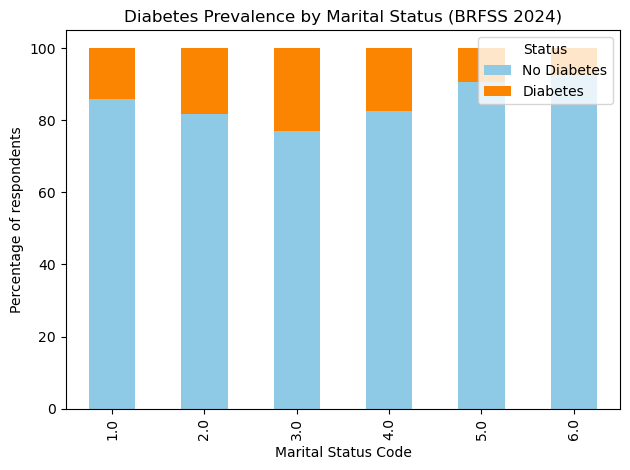

In [18]:

df = pd.read_csv(path)
# --- 1. Prepare target variable (binary diabetes indicator) ---
df['diab_bin'] = df['DIABETE4'].map({1: 1, 2: 0, 4: 0, 3:0})
df = df.dropna(subset=['diab_bin'])

# --- 2. Clean MARITAL variable ---
# Replace refused/missing codes (9, blank) with NaN
df['MARITAL'] = df['MARITAL'].replace({9: np.nan})
df = df.dropna(subset=['MARITAL'])

# --- 3. Chi-square test and Cramer's V ---
ct = pd.crosstab(df['diab_bin'], df['MARITAL'])
chi2, p, dof, exp = chi2_contingency(ct)
n = ct.sum().sum()
phi2 = chi2 / n
r, k = ct.shape
v = np.sqrt(phi2 / (min(k - 1, r - 1)))

print("=== Chi-square Test: Marital Status vs Diabetes ===")
print(ct)
print(f"\nChi2 = {chi2:.2f}, p-value = {p:.3e}, Cramer's V = {v:.3f}")
if p < 0.05:
    print("→ Statistically significant association between marital status and diabetes.")
else:
    print("→ No significant relationship detected.")

# --- 4. Diabetes prevalence by marital status ---
marital_summary = pd.crosstab(df['MARITAL'], df['diab_bin'], normalize='index') * 100
marital_summary.columns = ['No Diabetes', 'Diabetes']

# --- 5. Visualization ---
marital_summary.plot(kind='bar', stacked=True, color=['#8ecae6', '#fb8500'])
plt.title("Diabetes Prevalence by Marital Status (BRFSS 2024)")
plt.ylabel("Percentage of respondents")
plt.xlabel("Marital Status Code")
plt.legend(title="Status", loc="upper right")
plt.tight_layout()
plt.show()


=== Chi-square: MARITAL_GROUPED vs Diabetes ===
MARITAL_GROUPED  Div/Separated/Widowed  Married/Partnered  Never married
diab_bin                                                                
0.0                              93619             216760          76799
1.0                              23548              34020           7803

Chi2 = 5053.02, p-value = 0.000e+00, Cramer's V = 0.106
Counts per group:
 MARITAL_GROUPED
Married/Partnered        250780
Div/Separated/Widowed    117167
Never married             84602
Name: count, dtype: int64

Diabetes prevalence by marital group (%):
diab_bin               No Diabetes  Diabetes
MARITAL_GROUPED                             
Div/Separated/Widowed        79.90     20.10
Married/Partnered            86.43     13.57
Never married                90.78      9.22


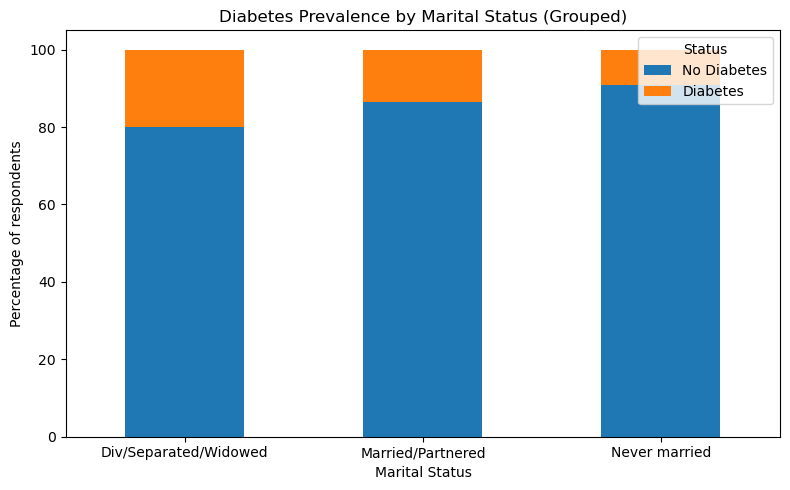

In [19]:
# ================== 1) Prep target (binary diabetes) ==================
# 1 = Diabetes; 2 = No; 4 = Prediabetes -> map to 0
df = pd.read_csv(path)
df = df.copy()
df['diab_bin'] = df['DIABETE4'].map({1: 1, 2: 0, 4: 0, 3:0})
df = df.dropna(subset=['diab_bin'])

# ================== 2) Clean & group MARITAL ==================
# Codes: 1=Married, 2=Divorced, 3=Widowed, 4=Separated, 5=Never married, 6=Unmarried couple, 9=Refused
df['MARITAL'] = df['MARITAL'].replace({9: np.nan})

# Group into 3 interpretable buckets
df['MARITAL_GROUPED'] = df['MARITAL'].replace({
    1: 'Married/Partnered',
    6: 'Married/Partnered',
    2: 'Div/Separated/Widowed',
    3: 'Div/Separated/Widowed',
    4: 'Div/Separated/Widowed',
    5: 'Never married'
})
df = df.dropna(subset=['MARITAL_GROUPED'])

# ================== 3) Chi-square & Cramer's V ==================
ct = pd.crosstab(df['diab_bin'], df['MARITAL_GROUPED'])
chi2, p, dof, exp = chi2_contingency(ct)

# Standard Cramer's V
n = ct.values.sum()
r, k = ct.shape
phi2 = chi2 / n
cramers_v = np.sqrt(phi2 / (min(r - 1, k - 1)))

print("=== Chi-square: MARITAL_GROUPED vs Diabetes ===")
print(ct)
print(f"\nChi2 = {chi2:.2f}, p-value = {p:.3e}, Cramer's V = {cramers_v:.3f}")
print("Counts per group:\n", df['MARITAL_GROUPED'].value_counts())

# ================== 4) Prevalence table ==================
share = pd.crosstab(df['MARITAL_GROUPED'], df['diab_bin'], normalize='index') * 100
share = share.rename(columns={0: 'No Diabetes', 1: 'Diabetes'})
print("\nDiabetes prevalence by marital group (%):")
print(share.round(2))

# ================== 5) Plot ==================
ax = share[['No Diabetes','Diabetes']].plot(
    kind='bar', stacked=True, figsize=(8,5)
)
plt.title("Diabetes Prevalence by Marital Status (Grouped)")
plt.ylabel("Percentage of respondents")
plt.xlabel("Marital Status")
plt.legend(title="Status", loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [20]:
# --- 1. Clean MARITAL variable safely ---
# Convert to numeric (in case it's stored as string)
df_cleaned['MARITAL'] = pd.to_numeric(df_cleaned['MARITAL'], errors='coerce')

# Replace 9 (Refused) with NaN, keep existing blanks/missing as NaN
df_cleaned['MARITAL'] = df_cleaned['MARITAL'].replace({9: np.nan})

# --- 2. Group into 3 categories ---
df_cleaned['MARITAL_GROUPED'] = df_cleaned['MARITAL'].replace({
    1: 'Married/Partnered',       # Married or living with partner
    6: 'Married/Partnered',
    2: 'Div/Separated/Widowed',   # Divorced, separated, or widowed
    3: 'Div/Separated/Widowed',
    4: 'Div/Separated/Widowed',
    5: 'Never married'            # Never married
})

# --- 3. Confirm results ---
print("Grouped marital status counts (including NaN):")
print(df_cleaned['MARITAL_GROUPED'].value_counts(dropna=False))

print("\nPercentage distribution (including NaN):")
print((df_cleaned['MARITAL_GROUPED'].value_counts(normalize=True) * 100).round(2))
print("Rows right now:", len(df_cleaned))

Grouped marital status counts (including NaN):
MARITAL_GROUPED
Married/Partnered        206505
Div/Separated/Widowed     96944
Never married             65342
NaN                        2664
Name: count, dtype: int64

Percentage distribution (including NaN):
MARITAL_GROUPED
Married/Partnered        56.00
Div/Separated/Widowed    26.29
Never married            17.72
Name: proportion, dtype: float64
Rows right now: 371455


In [21]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (371455, 70)


In [22]:
# --- Drop unnecessary columns safely ---
cols_to_drop = ['PREGNANT', 'MARITAL']  # old/raw variables

# Drop only if they exist in the dataframe
df_cleaned = df_cleaned.drop(columns=[c for c in cols_to_drop if c in df_cleaned.columns], errors='ignore')

print("Dropped columns:", [c for c in cols_to_drop if c not in df_cleaned.columns])
print("Remaining columns (sample):")
print(df_cleaned.columns[:])
print("Shape of filtered data:", df_cleaned.shape)

Dropped columns: ['PREGNANT', 'MARITAL']
Remaining columns (sample):
Index(['HADHYST2', 'HADMAM', '_RACEPRV', '_AGE_G', '_AIDTST4', '_BMI5',
       '_CHLDCNT', '_DRDXAR2', '_EDUCAG', '_EXTETH3', '_INCOMG1', '_LCSSMKG',
       '_LTASTH1', '_MENT14D', '_MICHD', '_PHYS14D', '_RFBING6', '_RFBMI5',
       '_RFDRHV9', '_RFHLTH', '_RFMAM23', '_RFSMOK3', '_SEX', '_TOTINDA',
       'HTIN4', 'WTKG3', 'CNCRTYP2', 'CADULT1', 'HHADULT', 'ADDEPEV3',
       'ASTHMA3', 'CHCCOPD3', 'CHCKDNY2', 'CHCOCNC1', 'CHCSCNC1', 'CVDCRHD4',
       'CVDINFR4', 'CVDSTRK3', 'DIABAGE4', 'DIABETE4', 'COLNCNCR', 'HADSIGM4',
       'EMPLOY1', 'WEIGHT2', 'BLIND', 'DEAF', 'DECIDE', 'DIFFALON', 'DIFFDRES',
       'DIFFWALK', 'CHECKUP1', 'PERSDOC3', 'PRIMINS2', 'GENHLTH', 'MENTHLTH',
       'PHYSHLTH', 'LCSCTSC1', 'QSTLANG', 'DISPCODE', 'EMTSUPRT', 'FOODSTMP',
       'LSATISFY', 'SDHFOOD1', 'USENOW3', '_METSTAT', '_URBSTAT', '_IMPRACE',
       'MARITAL_GROUPED'],
      dtype='object')
Shape of filtered data: (371455, 68)


In [23]:

# Convert to numeric (in case it's read as string)
df_cleaned['_EXTETH3'] = pd.to_numeric(df_cleaned['_EXTETH3'], errors='coerce')

# Map: 2 (Yes) → 1, 1 (No) → 0, keep 9/NaN as missing
df_cleaned['_EXTETH3'] = df_cleaned['_EXTETH3'].replace({1: 0, 2: 1, 9: np.nan})

# Confirm the transformation
print("Unique values after mapping:")
print(df_cleaned['_EXTETH3'].value_counts(dropna=False))


Unique values after mapping:
_EXTETH3
0.0    193911
1.0    170422
NaN      7122
Name: count, dtype: int64


In [24]:
df_cleaned = df_cleaned.rename(columns={'_EXTETH3': 'TeethExtracted'})

# Confirm results
print("Unique values and counts after renaming and mapping:")
print(df_cleaned['TeethExtracted'].value_counts(dropna=False))


Unique values and counts after renaming and mapping:
TeethExtracted
0.0    193911
1.0    170422
NaN      7122
Name: count, dtype: int64


In [25]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (371455, 68)


In [26]:
#We replace 9 ie missing value by null so that at end we can remove all missing values
# Convert to numeric (in case it's read as string)
df_cleaned['_EDUCAG'] = pd.to_numeric(df_cleaned['_EDUCAG'], errors='coerce')

# Replace 9 (Don't know / Missing) with NaN
df_cleaned['_EDUCAG'] = df_cleaned['_EDUCAG'].replace({9: np.nan})

# Confirm the change
print("Unique values and counts after cleaning:")
print(df_cleaned['_EDUCAG'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning:
_EDUCAG
4.0    159241
3.0     98984
2.0     91280
1.0     20532
NaN      1418
Name: count, dtype: int64
Shape of filtered data: (371455, 68)


In [27]:

# Convert to numeric in case it's stored as string
df_cleaned['_DRDXAR2'] = pd.to_numeric(df_cleaned['_DRDXAR2'], errors='coerce')

# Map: 1 = Has arthritis → 1, 2 = No arthritis → 0
df_cleaned['_DRDXAR2'] = df_cleaned['_DRDXAR2'].replace({1: 1, 2: 0})

# Keep blanks/NaN as they are (don't drop or fill)
# Confirm the mapping
print("Unique values and counts after mapping:")
print(df_cleaned['_DRDXAR2'].value_counts(dropna=False))
df_cleaned = df_cleaned.rename(columns={'_DRDXAR2': 'arthritis'})
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after mapping:
_DRDXAR2
0.0    235928
1.0    133715
NaN      1812
Name: count, dtype: int64
Shape of filtered data: (371455, 68)


In [28]:

# Convert to numeric
df_cleaned['HADHYST2'] = pd.to_numeric(df_cleaned['HADHYST2'], errors='coerce')
df_cleaned['_SEX'] = pd.to_numeric(df_cleaned['_SEX'], errors='coerce')

# Replace DK/Refused with NaN
df_cleaned['HADHYST2'] = df_cleaned['HADHYST2'].replace({7: np.nan, 9: np.nan})

# Option 1: Treat men as "No hysterectomy" (0)
df_cleaned.loc[df_cleaned['_SEX'] == 1, 'HADHYST2'] = 0

# Map: 1 = Yes, 2 = No → 1/0
df_cleaned['HADHYST2'] = df_cleaned['HADHYST2'].replace({1: 1, 2: 0})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'HADHYST2': 'hysterectomy'})

# Check distribution
print("Hysterectomy variable summary:")
print(df_cleaned['hysterectomy'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Hysterectomy variable summary:
hysterectomy
0.0    316932
1.0     51688
NaN      2835
Name: count, dtype: int64
Shape of filtered data: (371455, 68)


In [29]:
# Convert to numeric (handles strings safely)
df_cleaned['_AIDTST4'] = pd.to_numeric(df_cleaned['_AIDTST4'], errors='coerce')

# Map values: 1 = Yes → 1, 2 = No → 0, 9 and blanks stay as NaN
df_cleaned['_AIDTST4'] = df_cleaned['_AIDTST4'].replace({1: 1, 2: 0, 9: np.nan})

# Rename to descriptive name
df_cleaned = df_cleaned.rename(columns={'_AIDTST4': 'EverGotHIVTest'})

# Confirm the transformation
print("Unique values and counts after mapping and renaming:")
print(df_cleaned['EverGotHIVTest'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after mapping and renaming:
EverGotHIVTest
0.0    225534
1.0    127549
NaN     18372
Name: count, dtype: int64
Shape of filtered data: (371455, 68)


In [30]:
#No of children
# Convert to numeric (in case it's stored as string)
df_cleaned['_CHLDCNT'] = pd.to_numeric(df_cleaned['_CHLDCNT'], errors='coerce')

# Map: 
# 1 → 0 children
# 2 → 1 child
# 3 → 2 children
# 4 → 3 children
# 5 → 4 children
# 6 → 5 (for "5 or more")
# 9 and blanks stay NaN
df_cleaned['_CHLDCNT'] = df_cleaned['_CHLDCNT'].replace({
    1: 0,
    2: 1,
    3: 2,
    4: 3,
    5: 4,
    6: 5,
    9: np.nan
})

# Rename to descriptive name
df_cleaned = df_cleaned.rename(columns={'_CHLDCNT': 'NumChildren'})

# Confirm transformation
print("Unique values and counts after mapping:")
print(df_cleaned['NumChildren'].value_counts(dropna=False).sort_index())

print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after mapping:
NumChildren
0.0    280013
1.0     38730
2.0     30888
3.0     12654
4.0      4459
5.0      2359
NaN      2352
Name: count, dtype: int64
Shape of filtered data: (371455, 68)


In [31]:
# Convert to numeric (in case it's stored as string)
df_cleaned['_LTASTH1'] = pd.to_numeric(df_cleaned['_LTASTH1'], errors='coerce')

# Map: 2 = Has asthma → 1, 1 = No asthma → 0, 9 = NaN
df_cleaned['_LTASTH1'] = df_cleaned['_LTASTH1'].replace({1: 0, 2: 1, 9: np.nan})

# Rename column
df_cleaned = df_cleaned.rename(columns={'_LTASTH1': 'asthma'})

# Confirm transformation
print("Unique values and counts after mapping:")
print(df_cleaned['asthma'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after mapping:
asthma
0.0    311119
1.0     59013
NaN      1323
Name: count, dtype: int64
Shape of filtered data: (371455, 68)


In [32]:
#MentalHealth days
# Convert to numeric
df_cleaned['_MENT14D'] = pd.to_numeric(df_cleaned['_MENT14D'], errors='coerce')

# Replace 9 (missing/refused) with NaN
df_cleaned['_MENT14D'] = df_cleaned['_MENT14D'].replace({9: np.nan})

# Rename to a cleaner name
df_cleaned = df_cleaned.rename(columns={'_MENT14D': 'mental_health_status'})

# Confirm transformation
print("Unique values and counts after cleaning:")
print(df_cleaned['mental_health_status'].value_counts(dropna=False))

print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning:
mental_health_status
1.0    219627
2.0     95754
3.0     49912
NaN      6162
Name: count, dtype: int64
Shape of filtered data: (371455, 68)


In [33]:
#Heart DIsease
# --- 1. Convert _MICHD to numeric ---
df_cleaned['_MICHD'] = pd.to_numeric(df_cleaned['_MICHD'], errors='coerce')

# --- 2. Map: 1 = Has CHD or MI → 1, 2 = No CHD/MI → 0, blanks stay NaN ---
df_cleaned['_MICHD'] = df_cleaned['_MICHD'].replace({1: 1, 2: 0})

# --- 3. Rename for clarity ---
df_cleaned = df_cleaned.rename(columns={'_MICHD': 'heartDisease_CHD_or_MI'})

# --- 4. Drop the redundant raw columns if present ---
cols_to_drop = ['CVDINFR4', 'CVDCRHD4']
df_cleaned = df_cleaned.drop(columns=[c for c in cols_to_drop if c in df_cleaned.columns], errors='ignore')

# --- 5. Confirm transformation ---
print("Unique values and counts after cleaning and dropping redundant variables:")
print(df_cleaned['heartDisease_CHD_or_MI'].value_counts(dropna=False))

print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and dropping redundant variables:
heartDisease_CHD_or_MI
0.0    332231
1.0     35355
NaN      3869
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [34]:
print("Rows right now:", len(df_cleaned))
print("NumChildren rows counted:", df_cleaned['NumChildren'].value_counts(dropna=False).sum())
print("asthma rows counted:", df_cleaned['asthma'].value_counts(dropna=False).sum())

Rows right now: 371455
NumChildren rows counted: 371455
asthma rows counted: 371455


In [35]:
# Convert to numeric (in case it's read as string)
df_cleaned['_PHYS14D'] = pd.to_numeric(df_cleaned['_PHYS14D'], errors='coerce')

# Replace 9 (Don't know / Refused / Missing) with NaN
df_cleaned['_PHYS14D'] = df_cleaned['_PHYS14D'].replace({9: np.nan})

# Rename to clearer name
df_cleaned = df_cleaned.rename(columns={'_PHYS14D': 'physical_health_status'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['physical_health_status'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and renaming:
physical_health_status
1.0    216103
2.0     94687
3.0     52220
NaN      8445
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [36]:
# Convert to numeric (in case it's stored as string)
df_cleaned['_RFBING6'] = pd.to_numeric(df_cleaned['_RFBING6'], errors='coerce')

# Map: 1 = No → 0, 2 = Yes → 1, 9 / blank → NaN
df_cleaned['_RFBING6'] = df_cleaned['_RFBING6'].replace({1: 0, 2: 1, 9: np.nan})

# Rename to a clearer name
df_cleaned = df_cleaned.rename(columns={'_RFBING6': 'BingeDrinker'})

# Confirm transformation
print("Unique values and counts after mapping and renaming:")
print(df_cleaned['BingeDrinker'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after mapping and renaming:
BingeDrinker
0.0    318094
1.0     47477
NaN      5884
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [37]:
# Convert to numeric (in case it was read as string)
df_cleaned['_RFBMI5'] = pd.to_numeric(df_cleaned['_RFBMI5'], errors='coerce')

# Map values: 1 = No → 0, 2 = Yes → 1, 9 → NaN
df_cleaned['_RFBMI5'] = df_cleaned['_RFBMI5'].replace({1: 0, 2: 1, 9: np.nan})

# Rename the column
df_cleaned = df_cleaned.rename(columns={'_RFBMI5': 'OverweightOrObese'})

# Confirm result
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['OverweightOrObese'].value_counts(dropna=False))

print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and renaming:
OverweightOrObese
1.0    243299
0.0    106442
NaN     21714
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [38]:
# Convert to numeric (in case it's read as string)
df_cleaned['_RFDRHV9'] = pd.to_numeric(df_cleaned['_RFDRHV9'], errors='coerce')

# Map: 1 = No → 0, 2 = Yes → 1, 9 = NaN
df_cleaned['_RFDRHV9'] = df_cleaned['_RFDRHV9'].replace({1: 0, 2: 1, 9: np.nan})

# Rename to descriptive name
df_cleaned = df_cleaned.rename(columns={'_RFDRHV9': 'HeavyDrinker'})

# Confirm result
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['HeavyDrinker'].value_counts(dropna=False))

print("Shape of filtered data:", df_cleaned.shape)



Unique values and counts after cleaning and renaming:
HeavyDrinker
0.0    344560
1.0     21264
NaN      5631
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [39]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (371455, 66)


In [40]:
# Convert to numeric (in case it's read as string)
df_cleaned['GENHLTH'] = pd.to_numeric(df_cleaned['GENHLTH'], errors='coerce')

# Replace 7 (Don't know) and 9 (Refused) with NaN
df_cleaned['GENHLTH'] = df_cleaned['GENHLTH'].replace({7: np.nan, 9: np.nan})

# Rename column to clearer name
df_cleaned = df_cleaned.rename(columns={'GENHLTH': 'HealthRating'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['HealthRating'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and renaming:
HealthRating
3.0    126977
2.0    119734
4.0     55261
1.0     50737
5.0     17809
NaN       937
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [41]:
# Convert to numeric (in case it's stored as string)
df_cleaned['_RFHLTH'] = pd.to_numeric(df_cleaned['_RFHLTH'], errors='coerce')

# Map values: 1 = Good/Better Health → 1, 2 = Fair/Poor Health → 0, 9 = NaN
df_cleaned['_RFHLTH'] = df_cleaned['_RFHLTH'].replace({1: 1, 2: 0, 9: np.nan})

# Rename to a clearer name
df_cleaned = df_cleaned.rename(columns={'_RFHLTH': 'GoodHealth'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['GoodHealth'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and renaming:
GoodHealth
1.0    297448
0.0     73070
NaN       937
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [42]:
# Convert to numeric (in case it's stored as string)
df_cleaned['_RFSMOK3'] = pd.to_numeric(df_cleaned['_RFSMOK3'], errors='coerce')

# Map: 1 = No → 0, 2 = Yes → 1, 9 = NaN
df_cleaned['_RFSMOK3'] = df_cleaned['_RFSMOK3'].replace({1: 0, 2: 1, 9: np.nan})

# Rename the column
df_cleaned = df_cleaned.rename(columns={'_RFSMOK3': 'CurrentSmoker'})

# Confirm the transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['CurrentSmoker'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and renaming:
CurrentSmoker
0.0    329470
1.0     39637
NaN      2348
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [43]:
# Convert to numeric (in case it's stored as string)
df_cleaned['_TOTINDA'] = pd.to_numeric(df_cleaned['_TOTINDA'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 9 = NaN
df_cleaned['_TOTINDA'] = df_cleaned['_TOTINDA'].replace({1: 1, 2: 0, 9: np.nan})

# Rename the column
df_cleaned = df_cleaned.rename(columns={'_TOTINDA': 'PhysicalActivityLast30Days'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['PhysicalActivityLast30Days'].value_counts(dropna=False))
print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and renaming:
PhysicalActivityLast30Days
1.0    284922
0.0     85613
NaN       920
Name: count, dtype: int64
Shape of filtered data: (371455, 66)


In [44]:
# Convert to numeric (in case stored as string)
df_cleaned['HTIN4'] = pd.to_numeric(df_cleaned['HTIN4'], errors='coerce')

# Replace out-of-range or blank values with NaN (CDC valid range: 36–95 inches)
df_cleaned.loc[(df_cleaned['HTIN4'] < 36) | (df_cleaned['HTIN4'] > 95), 'HTIN4'] = np.nan

# Rename column for clarity
df_cleaned = df_cleaned.rename(columns={'HTIN4': 'HeightInches'})

# Confirm transformation
print("Summary of HeightInches:")
print(df_cleaned['HeightInches'].describe())
print("Shape of filtered data:", df_cleaned.shape)

Summary of HeightInches:
count    358458.000000
mean         67.028637
std           4.190658
min          36.000000
25%          64.000000
50%          67.000000
75%          70.000000
max          95.000000
Name: HeightInches, dtype: float64
Shape of filtered data: (371455, 66)


In [45]:
# Convert to numeric (in case it's stored as string)
df_cleaned['WTKG3'] = pd.to_numeric(df_cleaned['WTKG3'], errors='coerce')

# Replace invalid or out-of-range values with NaN (CDC valid range: 23.00 – 295.00 kg with 2 implied decimals)
# Note: Raw values are stored *without* decimals, e.g., 7000 = 70.00 kg
df_cleaned.loc[(df_cleaned['WTKG3'] < 2300) | (df_cleaned['WTKG3'] > 29500), 'WTKG3'] = np.nan

# Convert to actual kilograms (divide by 100 to apply implied decimals)
df_cleaned['WTKG3'] = df_cleaned['WTKG3'] / 100.0

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'WTKG3': 'WeightKg'})

# Confirm transformation
print("Summary of WeightKg:")
print(df_cleaned['WeightKg'].describe())


Summary of WeightKg:
count    354340.000000
mean         83.206439
std          21.438106
min          23.000000
25%          68.040000
50%          81.190000
75%          95.250000
max         290.300000
Name: WeightKg, dtype: float64


In [46]:
# Convert to numeric if needed
df_cleaned['CADULT1'] = pd.to_numeric(df_cleaned['CADULT1'], errors='coerce')

# Display unique values (including NaN)
print("Unique values in CADULT1:")
print(df_cleaned['CADULT1'].unique())

# Show counts (include NaN)
print("\nValue counts (including NaN):")
print(df_cleaned['CADULT1'].value_counts(dropna=False))


Unique values in CADULT1:
[nan  1.]

Value counts (including NaN):
CADULT1
1.0    301050
NaN     70405
Name: count, dtype: int64


In [47]:
# Drop rows where CADULT1 is NaN
df_cleaned = df_cleaned.dropna(subset=['CADULT1'])

# Confirm results
print("Rows remaining after dropping NaN in CADULT1:", len(df_cleaned))
print("Unique values now:", df_cleaned['CADULT1'].unique())
print("Shape of filtered data:", df_cleaned.shape)

Rows remaining after dropping NaN in CADULT1: 301050
Unique values now: [1.]
Shape of filtered data: (301050, 66)


In [48]:
# Convert to numeric (in case it's stored as string)
df_cleaned['HHADULT'] = pd.to_numeric(df_cleaned['HHADULT'], errors='coerce')

# Replace 77 (Don't know) and 99 (Refused) with NaN
df_cleaned['HHADULT'] = df_cleaned['HHADULT'].replace({77: np.nan, 99: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'HHADULT': 'NumAdultsHousehold'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['NumAdultsHousehold'].value_counts(dropna=False).sort_index())


Unique values and counts after cleaning and renaming:
NumAdultsHousehold
0.0          1
1.0      76459
2.0     148324
3.0      43145
4.0      20502
5.0       6522
6.0       2038
7.0        673
8.0        293
9.0        101
10.0       118
11.0        24
12.0        64
13.0        29
14.0        21
15.0        11
16.0         9
17.0        10
18.0        29
20.0         2
21.0         1
23.0         2
43.0         1
58.0         1
71.0         1
NaN       2669
Name: count, dtype: int64


In [49]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 66)


In [50]:
# Convert to numeric (in case it's stored as string)
df_cleaned['ADDEPEV3'] = pd.to_numeric(df_cleaned['ADDEPEV3'], errors='coerce')

# Map values: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['ADDEPEV3'] = df_cleaned['ADDEPEV3'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'ADDEPEV3': 'DepressiveDisorder'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['DepressiveDisorder'].value_counts(dropna=False))


Unique values and counts after cleaning and renaming:
DepressiveDisorder
0.0    231063
1.0     68448
NaN      1539
Name: count, dtype: int64


In [51]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 66)


In [52]:
# Drop the 'ASTHMA3' column if it exists
df_cleaned = df_cleaned.drop(columns=['ASTHMA3'], errors='ignore')

# Confirm it's gone
print("'ASTHMA3' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'ASTHMA3' column dropped (if it existed).
Current number of columns: 65


In [53]:
# Convert to numeric (in case stored as string)
df_cleaned['CHCCOPD3'] = pd.to_numeric(df_cleaned['CHCCOPD3'], errors='coerce')

# Map values: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['CHCCOPD3'] = df_cleaned['CHCCOPD3'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename the column
df_cleaned = df_cleaned.rename(columns={'CHCCOPD3': 'COPD'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['COPD'].value_counts(dropna=False))


Unique values and counts after cleaning and renaming:
COPD
0.0    278039
1.0     21859
NaN      1152
Name: count, dtype: int64


In [54]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 65)


In [55]:
# Convert to numeric (in case it's stored as string)
df_cleaned['CHCKDNY2'] = pd.to_numeric(df_cleaned['CHCKDNY2'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['CHCKDNY2'] = df_cleaned['CHCKDNY2'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename the column
df_cleaned = df_cleaned.rename(columns={'CHCKDNY2': 'KidneyDisease'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['KidneyDisease'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
KidneyDisease
0.0    286302
1.0     13746
NaN      1002
Name: count, dtype: int64


In [56]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 65)


In [57]:
# --- 1. Clean CHCSCNC1 (Skin cancer not melanoma) ---
df_cleaned['CHCSCNC1'] = pd.to_numeric(df_cleaned['CHCSCNC1'], errors='coerce')
df_cleaned['CHCSCNC1'] = df_cleaned['CHCSCNC1'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})
df_cleaned = df_cleaned.rename(columns={'CHCSCNC1': 'SkinCancerNonMelanoma'})

# --- 2. Clean CHCOCNC1 (Melanoma or any other cancer) ---
df_cleaned['CHCOCNC1'] = pd.to_numeric(df_cleaned['CHCOCNC1'], errors='coerce')
df_cleaned['CHCOCNC1'] = df_cleaned['CHCOCNC1'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})
df_cleaned = df_cleaned.rename(columns={'CHCOCNC1': 'Cancer_MelanomaOrOther'})

# --- 3. Confirm transformation ---
print("Unique values after cleaning and renaming:")
print("\nSkinCancerNonMelanoma:")
print(df_cleaned['SkinCancerNonMelanoma'].value_counts(dropna=False))

print("\nCancer_MelanomaOrOther:")
print(df_cleaned['Cancer_MelanomaOrOther'].value_counts(dropna=False))

Unique values after cleaning and renaming:

SkinCancerNonMelanoma:
SkinCancerNonMelanoma
0.0    276952
1.0     22465
NaN      1633
Name: count, dtype: int64

Cancer_MelanomaOrOther:
Cancer_MelanomaOrOther
0.0    267517
1.0     32272
NaN      1261
Name: count, dtype: int64


In [58]:
# Convert to numeric (in case it's stored as string)
df_cleaned['CVDSTRK3'] = pd.to_numeric(df_cleaned['CVDSTRK3'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['CVDSTRK3'] = df_cleaned['CVDSTRK3'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'CVDSTRK3': 'Stroke'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['Stroke'].value_counts(dropna=False))


Unique values and counts after cleaning and renaming:
Stroke
0.0    288615
1.0     11727
NaN       708
Name: count, dtype: int64


In [59]:
# Drop the 'DIABAGE4' column if it exists
df_cleaned = df_cleaned.drop(columns=['DIABAGE4'], errors='ignore')

# Confirm it's gone
print("'DIABAGE4' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))
print("Shape of filtered data:", df_cleaned.shape)

'DIABAGE4' column dropped (if it existed).
Current number of columns: 64
Shape of filtered data: (301050, 64)


In [60]:
df_cleaned['_INCOMG1'] = pd.to_numeric(df_cleaned['_INCOMG1'], errors='coerce')

# Replace 9 (Don't know / Missing) with NaN
df_cleaned['_INCOMG1'] = df_cleaned['_INCOMG1'].replace({9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'_INCOMG1': 'IncomeCategory'})

# Optional: map descriptive income ranges
income_labels = {
    1: '< $15,000',
    2: '$15,000–$24,999',
    3: '$25,000–$34,999',
    4: '$35,000–$49,999',
    5: '$50,000–$99,999',
    6: '$100,000–$199,999',
    7: '$200,000 or more'
}

df_cleaned['IncomeCategoryLabel'] = df_cleaned['IncomeCategory'].map(income_labels)

In [61]:
# Drop the 'DIABAGE4' column if it exists
df_cleaned = df_cleaned.drop(columns=['INCOME3'], errors='ignore')

# Confirm it's gone
print("'INCOME3' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))
print("Shape of filtered data:", df_cleaned.shape)

'INCOME3' column dropped (if it existed).
Current number of columns: 65
Shape of filtered data: (301050, 65)


In [62]:
# Convert to numeric (in case it's stored as string)
df_cleaned['BLIND'] = pd.to_numeric(df_cleaned['BLIND'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['BLIND'] = df_cleaned['BLIND'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'BLIND': 'BlindOrDifficultySeeing'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['BlindOrDifficultySeeing'].value_counts(dropna=False))


Unique values and counts after cleaning and renaming:
BlindOrDifficultySeeing
0.0    284608
1.0     15467
NaN       975
Name: count, dtype: int64


In [63]:

print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 65)


In [64]:
# Convert to numeric (in case it's stored as string)
df_cleaned['DEAF'] = pd.to_numeric(df_cleaned['DEAF'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['DEAF'] = df_cleaned['DEAF'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'DEAF': 'DeafOrDifficultyHearing'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['DeafOrDifficultyHearing'].value_counts(dropna=False))

print("Shape of filtered data:", df_cleaned.shape)

Unique values and counts after cleaning and renaming:
DeafOrDifficultyHearing
0.0    275844
1.0     24128
NaN      1078
Name: count, dtype: int64
Shape of filtered data: (301050, 65)


In [65]:
# Convert to numeric (in case it's stored as string)
df_cleaned['DECIDE'] = pd.to_numeric(df_cleaned['DECIDE'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['DECIDE'] = df_cleaned['DECIDE'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'DECIDE': 'DifficultyConcentrating'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['DifficultyConcentrating'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
DifficultyConcentrating
0.0    261160
1.0     38134
NaN      1756
Name: count, dtype: int64


In [66]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 65)


In [67]:
# Convert to numeric (in case it's stored as string)
df_cleaned['DIFFALON'] = pd.to_numeric(df_cleaned['DIFFALON'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['DIFFALON'] = df_cleaned['DIFFALON'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'DIFFALON': 'DifficultyDoingErrandsAlone'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['DifficultyDoingErrandsAlone'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
DifficultyDoingErrandsAlone
0.0    278097
1.0     22136
NaN       817
Name: count, dtype: int64


In [68]:
# Convert to numeric (in case it's stored as string)
df_cleaned['DIFFDRES'] = pd.to_numeric(df_cleaned['DIFFDRES'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['DIFFDRES'] = df_cleaned['DIFFDRES'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'DIFFDRES': 'DifficultyDressingBathing'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['DifficultyDressingBathing'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
DifficultyDressingBathing
0.0    289345
1.0     11271
NaN       434
Name: count, dtype: int64


In [69]:

# Convert to numeric (in case it's stored as string)
df_cleaned['DIFFWALK'] = pd.to_numeric(df_cleaned['DIFFWALK'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['DIFFWALK'] = df_cleaned['DIFFWALK'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'DIFFWALK': 'DifficultyWalkingClimbing'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['DifficultyWalkingClimbing'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
DifficultyWalkingClimbing
0.0    257376
1.0     42737
NaN       937
Name: count, dtype: int64


In [70]:
#5 corresponds to never 
# Convert to numeric (in case stored as string)
df_cleaned['CHECKUP1'] = pd.to_numeric(df_cleaned['CHECKUP1'], errors='coerce')

# Replace: 7, 9 = NaN; 8 (Never) → 5 (same as "5+ years ago")
df_cleaned['CHECKUP1'] = df_cleaned['CHECKUP1'].replace({7: np.nan, 9: np.nan, 8: 5})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'CHECKUP1': 'TimeSinceLastCheckup'})

# Confirm transformation
print("Unique values and counts after cleaning:")
print(df_cleaned['TimeSinceLastCheckup'].value_counts(dropna=False).sort_index())

Unique values and counts after cleaning:
TimeSinceLastCheckup
1.0    238969
2.0     28043
3.0     15595
4.0     13221
5.0      1935
NaN      3287
Name: count, dtype: int64


In [71]:
# Convert to numeric (in case it's stored as string)
df_cleaned['PERSDOC3'] = pd.to_numeric(df_cleaned['PERSDOC3'], errors='coerce')

# Map: 1 or 2 = Yes → 1, 3 = No → 0, 7/9 = NaN
df_cleaned['PERSDOC3'] = df_cleaned['PERSDOC3'].replace({1: 1, 2: 1, 3: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'PERSDOC3': 'HasPersonalHealthProvider'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['HasPersonalHealthProvider'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
HasPersonalHealthProvider
1.0    259387
0.0     38905
NaN      2758
Name: count, dtype: int64


In [72]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 65)


In [73]:
df_cleaned['PRIMINS2'] = pd.to_numeric(df_cleaned['PRIMINS2'], errors='coerce')
df_cleaned['PRIMINS2'] = df_cleaned['PRIMINS2'].replace({77: np.nan, 99: np.nan})
df_cleaned = df_cleaned.rename(columns={'PRIMINS2': 'PrimaryHealthCoverage'})
print(df_cleaned['PrimaryHealthCoverage'].value_counts(dropna=False))

PrimaryHealthCoverage
1.0     115760
3.0      78755
2.0      26411
5.0      23591
88.0     17985
NaN      11159
7.0      10942
9.0       8594
10.0      6594
8.0        917
4.0        242
6.0        100
Name: count, dtype: int64


In [74]:
# Map numeric codes to descriptive coverage types
coverage_map = {
    1: 'Employer or union plan',
    2: 'Private purchased plan',
    3: 'Medicare',
    4: 'Medigap',
    5: 'Medicaid',
    6: 'CHIP (Children’s Health Insurance Program)',
    7: 'Military / VA / TRICARE / CHAMP-VA',
    8: 'Indian Health Service',
    9: 'State sponsored health plan',
    10: 'Other government program',
    88: 'No coverage'
}

df_cleaned['PrimaryHealthCoverage'] = df_cleaned['PrimaryHealthCoverage'].replace(coverage_map)



In [75]:
# Convert to numeric (in case stored as string)
df_cleaned['MENTHLTH'] = pd.to_numeric(df_cleaned['MENTHLTH'], errors='coerce')

# Replace codes:
# 88 → 0 (no bad days), 77/99 → NaN (invalid / refused)
df_cleaned['MENTHLTH'] = df_cleaned['MENTHLTH'].replace({88: 0, 77: np.nan, 99: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'MENTHLTH': 'MentalHealthBadDays'})

# Confirm transformation
print("Unique values and summary after cleaning and renaming:")
print(df_cleaned['MentalHealthBadDays'].describe())
print("\nValue counts (first 15 shown):")
print(df_cleaned['MentalHealthBadDays'].value_counts(dropna=False).sort_index().head(15))

Unique values and summary after cleaning and renaming:
count    296362.000000
mean          4.651936
std           8.472524
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          30.000000
Name: MentalHealthBadDays, dtype: float64

Value counts (first 15 shown):
MentalHealthBadDays
0.0     170750
1.0      10603
2.0      17484
3.0      11299
4.0       5906
5.0      15081
6.0       1635
7.0       5965
8.0       1333
9.0        234
10.0     11553
11.0        97
12.0       961
13.0       139
14.0      2064
Name: count, dtype: int64


In [76]:
# Convert to numeric (in case it's stored as string)
df_cleaned['PHYSHLTH'] = pd.to_numeric(df_cleaned['PHYSHLTH'], errors='coerce')

# Replace: 88 → 0 (no bad days), 77/99 → NaN (invalid / refused)
df_cleaned['PHYSHLTH'] = df_cleaned['PHYSHLTH'].replace({88: 0, 77: np.nan, 99: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'PHYSHLTH': 'PhysicalHealthBadDays'})

# Confirm transformation
print("Summary of PhysicalHealthBadDays:")
print(df_cleaned['PhysicalHealthBadDays'].describe())
print("\nValue counts (first 15 shown):")
print(df_cleaned['PhysicalHealthBadDays'].value_counts(dropna=False).sort_index().head(15))

Summary of PhysicalHealthBadDays:
count    294828.000000
mean          4.461869
std           8.728518
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: PhysicalHealthBadDays, dtype: float64

Value counts (first 15 shown):
PhysicalHealthBadDays
0.0     175713
1.0      12854
2.0      19277
3.0      11700
4.0       6234
5.0      10892
6.0       1651
7.0       6391
8.0       1255
9.0        281
10.0      7232
11.0        94
12.0       756
13.0       105
14.0      3129
Name: count, dtype: int64


In [77]:
# Convert to numeric
df_cleaned['LCSCTSC1'] = pd.to_numeric(df_cleaned['LCSCTSC1'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['LCSCTSC1'] = df_cleaned['LCSCTSC1'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'LCSCTSC1': 'ChestCTScan'})

# Check results
print(df_cleaned['ChestCTScan'].value_counts(dropna=False))

ChestCTScan
0.0    165935
1.0    124825
NaN     10290
Name: count, dtype: int64


In [78]:
# Convert to numeric (in case it's stored as string)
df_cleaned['EMTSUPRT'] = pd.to_numeric(df_cleaned['EMTSUPRT'], errors='coerce')

# Replace 7/9 with NaN
df_cleaned['EMTSUPRT'] = df_cleaned['EMTSUPRT'].replace({7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'EMTSUPRT': 'EmotionalSupport'})

# Confirm
print("Unique values and counts after cleaning:")
print(df_cleaned['EmotionalSupport'].value_counts(dropna=False).sort_index())

Unique values and counts after cleaning:
EmotionalSupport
1.0     72129
2.0     46505
3.0     20933
4.0      6920
5.0      5950
NaN    148613
Name: count, dtype: int64


In [79]:
# Convert to numeric (in case it's stored as string)
df_cleaned['FOODSTMP'] = pd.to_numeric(df_cleaned['FOODSTMP'], errors='coerce')

# Map: 1 = Yes → 1, 2 = No → 0, 7/9 = NaN
df_cleaned['FOODSTMP'] = df_cleaned['FOODSTMP'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'FOODSTMP': 'ReceivedFoodStamps'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['ReceivedFoodStamps'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
ReceivedFoodStamps
NaN    147270
0.0    138510
1.0     15270
Name: count, dtype: int64


In [80]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 65)


In [81]:
# Convert to numeric (in case it's stored as string)
df_cleaned['LSATISFY'] = pd.to_numeric(df_cleaned['LSATISFY'], errors='coerce')

# Replace: 7, 9 = NaN
df_cleaned['LSATISFY'] = df_cleaned['LSATISFY'].replace({7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'LSATISFY': 'LifeSatisfaction'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['LifeSatisfaction'].value_counts(dropna=False).sort_index())


Unique values and counts after cleaning and renaming:
LifeSatisfaction
1.0     67967
2.0     76091
3.0      7048
4.0      1897
NaN    148047
Name: count, dtype: int64


In [82]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 65)


In [83]:
# Convert to numeric
df_cleaned['SDHFOOD1'] = pd.to_numeric(df_cleaned['SDHFOOD1'], errors='coerce')

# Replace 7 and 9 with NaN
df_cleaned['SDHFOOD1'] = df_cleaned['SDHFOOD1'].replace({7: np.nan, 9: np.nan})

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'SDHFOOD1': 'FoodInsecurity'})

# Check distribution
print(df_cleaned['FoodInsecurity'].value_counts(dropna=False).sort_index())

FoodInsecurity
1.0      3702
2.0      3339
3.0     12656
4.0     14138
5.0    119777
NaN    147438
Name: count, dtype: int64


In [84]:
df_cleaned = df_cleaned.rename(columns={'_AGE_G': 'AgeGroup'})

# Confirm rename
print("Column renamed. Sample values:")
print(df_cleaned['AgeGroup'].value_counts(dropna=False).sort_index())

Column renamed. Sample values:
AgeGroup
1.0    21461
2.0    37306
3.0    46429
4.0    48200
5.0    57256
6.0    90398
Name: count, dtype: int64


In [85]:
df_cleaned = df_cleaned.rename(columns={'_AGE_G': 'AgeGroup'})

# Confirm rename
print("Column renamed. Sample values:")
print(df_cleaned['AgeGroup'].value_counts(dropna=False).sort_index())

Column renamed. Sample values:
AgeGroup
1.0    21461
2.0    37306
3.0    46429
4.0    48200
5.0    57256
6.0    90398
Name: count, dtype: int64


In [86]:
# Quick summary of each column
summary = pd.DataFrame({
    'DataType': df_cleaned.dtypes,
    'NonNullCount': df_cleaned.notna().sum(),
    'UniqueValues': df_cleaned.nunique(dropna=False)
})

# Optional: show up to 10 sample unique values for each column
summary['SampleUniqueValues'] = df_cleaned.apply(
    lambda x: x.dropna().unique()[:10] if x.nunique() > 0 else [], axis=0
)

# Display
pd.set_option('display.max_colwidth', None)
print(summary)


                            DataType  NonNullCount  UniqueValues  \
hysterectomy                 float64        298438             3   
HADMAM                       float64        151195             5   
_RACEPRV                     float64        301050             8   
AgeGroup                     float64        301050             6   
EverGotHIVTest               float64        287194             3   
_BMI5                        float64        283808          3898   
NumChildren                  float64        298915             7   
arthritis                    float64        299651             3   
_EDUCAG                      float64        299857             5   
TeethExtracted               float64        296334             3   
IncomeCategory               float64        256251             8   
_LCSSMKG                     float64        289067             7   
asthma                       float64        300006             3   
mental_health_status         float64        2963

In [87]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(df_cleaned[col].drop_duplicates().sort_values().to_list())



Column: hysterectomy
Unique values:
[0.0, 1.0, nan]

Column: HADMAM
Unique values:
[1.0, 2.0, 7.0, 9.0, nan]

Column: _RACEPRV
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

Column: AgeGroup
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

Column: EverGotHIVTest
Unique values:
[0.0, 1.0, nan]

Column: _BMI5
Unique values:
[1211.0, 1213.0, 1216.0, 1217.0, 1219.0, 1220.0, 1221.0, 1222.0, 1227.0, 1236.0, 1240.0, 1241.0, 1244.0, 1248.0, 1250.0, 1253.0, 1255.0, 1256.0, 1259.0, 1269.0, 1286.0, 1287.0, 1288.0, 1291.0, 1292.0, 1293.0, 1298.0, 1300.0, 1301.0, 1308.0, 1310.0, 1312.0, 1313.0, 1316.0, 1317.0, 1318.0, 1319.0, 1322.0, 1325.0, 1329.0, 1331.0, 1338.0, 1345.0, 1347.0, 1349.0, 1350.0, 1352.0, 1353.0, 1356.0, 1363.0, 1364.0, 1365.0, 1366.0, 1367.0, 1368.0, 1371.0, 1372.0, 1373.0, 1375.0, 1376.0, 1378.0, 1381.0, 1382.0, 1385.0, 1387.0, 1388.0, 1390.0, 1391.0, 1393.0, 1395.0, 1398.0, 1399.0, 1400.0, 1403.0, 1406.0, 1408.0, 1410.0, 1412.0, 1414.0, 1417.0, 1420.0, 1424.0, 1425.0, 14

In [88]:
# Drop the '_RFMAM23' column if it exists
df_cleaned = df_cleaned.drop(columns=['_RFMAM23'], errors='ignore')

# Confirm it's gone
print("'_RFMAM23' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'_RFMAM23' column dropped (if it existed).
Current number of columns: 64


In [89]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(df_cleaned[col].drop_duplicates().sort_values().to_list())



Column: hysterectomy
Unique values:
[0.0, 1.0, nan]

Column: HADMAM
Unique values:
[1.0, 2.0, 7.0, 9.0, nan]

Column: _RACEPRV
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

Column: AgeGroup
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

Column: EverGotHIVTest
Unique values:
[0.0, 1.0, nan]

Column: _BMI5
Unique values:
[1211.0, 1213.0, 1216.0, 1217.0, 1219.0, 1220.0, 1221.0, 1222.0, 1227.0, 1236.0, 1240.0, 1241.0, 1244.0, 1248.0, 1250.0, 1253.0, 1255.0, 1256.0, 1259.0, 1269.0, 1286.0, 1287.0, 1288.0, 1291.0, 1292.0, 1293.0, 1298.0, 1300.0, 1301.0, 1308.0, 1310.0, 1312.0, 1313.0, 1316.0, 1317.0, 1318.0, 1319.0, 1322.0, 1325.0, 1329.0, 1331.0, 1338.0, 1345.0, 1347.0, 1349.0, 1350.0, 1352.0, 1353.0, 1356.0, 1363.0, 1364.0, 1365.0, 1366.0, 1367.0, 1368.0, 1371.0, 1372.0, 1373.0, 1375.0, 1376.0, 1378.0, 1381.0, 1382.0, 1385.0, 1387.0, 1388.0, 1390.0, 1391.0, 1393.0, 1395.0, 1398.0, 1399.0, 1400.0, 1403.0, 1406.0, 1408.0, 1410.0, 1412.0, 1414.0, 1417.0, 1420.0, 1424.0, 1425.0, 14

In [90]:

# Drop the 'CADULT1' column if it exists
df_cleaned = df_cleaned.drop(columns=['CADULT1'], errors='ignore')

# Confirm it's gone
print("'CADULT1' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))

'CADULT1' column dropped (if it existed).
Current number of columns: 63


In [91]:
# Drop the 'HADMAM' column if it exists
df_cleaned = df_cleaned.drop(columns=['HADMAM'], errors='ignore')

# Confirm it's gone
print("'HADMAM' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'HADMAM' column dropped (if it existed).
Current number of columns: 62


In [92]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(df_cleaned[col].drop_duplicates().sort_values().to_list())



Column: hysterectomy
Unique values:
[0.0, 1.0, nan]

Column: _RACEPRV
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

Column: AgeGroup
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

Column: EverGotHIVTest
Unique values:
[0.0, 1.0, nan]

Column: _BMI5
Unique values:
[1211.0, 1213.0, 1216.0, 1217.0, 1219.0, 1220.0, 1221.0, 1222.0, 1227.0, 1236.0, 1240.0, 1241.0, 1244.0, 1248.0, 1250.0, 1253.0, 1255.0, 1256.0, 1259.0, 1269.0, 1286.0, 1287.0, 1288.0, 1291.0, 1292.0, 1293.0, 1298.0, 1300.0, 1301.0, 1308.0, 1310.0, 1312.0, 1313.0, 1316.0, 1317.0, 1318.0, 1319.0, 1322.0, 1325.0, 1329.0, 1331.0, 1338.0, 1345.0, 1347.0, 1349.0, 1350.0, 1352.0, 1353.0, 1356.0, 1363.0, 1364.0, 1365.0, 1366.0, 1367.0, 1368.0, 1371.0, 1372.0, 1373.0, 1375.0, 1376.0, 1378.0, 1381.0, 1382.0, 1385.0, 1387.0, 1388.0, 1390.0, 1391.0, 1393.0, 1395.0, 1398.0, 1399.0, 1400.0, 1403.0, 1406.0, 1408.0, 1410.0, 1412.0, 1414.0, 1417.0, 1420.0, 1424.0, 1425.0, 1427.0, 1429.0, 1431.0, 1435.0, 1438.0, 1442.0, 1444.0, 144

In [93]:
# Convert to numeric (in case stored as string)
df_cleaned['_RACEPRV'] = pd.to_numeric(df_cleaned['_RACEPRV'], errors='coerce')

# Map numeric codes to descriptive race categories
race_map = {
    1: 'White, non-Hispanic',
    2: 'Black, non-Hispanic',
    3: 'American Indian/Alaska Native, non-Hispanic',
    4: 'Asian, non-Hispanic',
    5: 'Native Hawaiian/Pacific Islander, non-Hispanic',
    6: 'Other race, non-Hispanic',
    7: 'Multiracial, non-Hispanic',
    8: 'Hispanic'
}

df_cleaned['_RACEPRV'] = df_cleaned['_RACEPRV'].replace(race_map)

# Rename the column for clarity
df_cleaned = df_cleaned.rename(columns={'_RACEPRV': 'RaceCategory'})

# Confirm transformation
print("Unique race categories after mapping and renaming:")
print(df_cleaned['RaceCategory'].value_counts(dropna=False))

Unique race categories after mapping and renaming:
RaceCategory
White, non-Hispanic                               218499
Hispanic                                           36013
Black, non-Hispanic                                22228
Asian, non-Hispanic                                 8640
Multiracial, non-Hispanic                           7378
American Indian/Alaska Native, non-Hispanic         4182
Other race, non-Hispanic                            2641
Native Hawaiian/Pacific Islander, non-Hispanic      1469
Name: count, dtype: int64


In [94]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(df_cleaned[col].drop_duplicates().sort_values().to_list())



Column: hysterectomy
Unique values:
[0.0, 1.0, nan]

Column: RaceCategory
Unique values:
['American Indian/Alaska Native, non-Hispanic', 'Asian, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Multiracial, non-Hispanic', 'Native Hawaiian/Pacific Islander, non-Hispanic', 'Other race, non-Hispanic', 'White, non-Hispanic']

Column: AgeGroup
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

Column: EverGotHIVTest
Unique values:
[0.0, 1.0, nan]

Column: _BMI5
Unique values:
[1211.0, 1213.0, 1216.0, 1217.0, 1219.0, 1220.0, 1221.0, 1222.0, 1227.0, 1236.0, 1240.0, 1241.0, 1244.0, 1248.0, 1250.0, 1253.0, 1255.0, 1256.0, 1259.0, 1269.0, 1286.0, 1287.0, 1288.0, 1291.0, 1292.0, 1293.0, 1298.0, 1300.0, 1301.0, 1308.0, 1310.0, 1312.0, 1313.0, 1316.0, 1317.0, 1318.0, 1319.0, 1322.0, 1325.0, 1329.0, 1331.0, 1338.0, 1345.0, 1347.0, 1349.0, 1350.0, 1352.0, 1353.0, 1356.0, 1363.0, 1364.0, 1365.0, 1366.0, 1367.0, 1368.0, 1371.0, 1372.0, 1373.0, 1375.0, 1376.0, 1378.0, 1381.0, 1382.0, 1385.0, 1387.0, 1388

In [95]:
df_cleaned = df_cleaned.rename(columns={'_BMI5': 'BMI'})

# Confirm transformation
print("Unique BMI categories after mapping and renaming:")
print(df_cleaned['BMI'].value_counts(dropna=False))

Unique BMI categories after mapping and renaming:
BMI
NaN       17242
2663.0     3014
2441.0     2285
2746.0     2276
2712.0     2184
2744.0     2166
2510.0     1896
3228.0     1731
2953.0     1655
2870.0     1649
2584.0     1592
2509.0     1576
2929.0     1570
2661.0     1391
2439.0     1384
2889.0     1370
2506.0     1367
2583.0     1365
2658.0     1344
2825.0     1344
2905.0     1336
3041.0     1322
2421.0     1308
2834.0     1308
2496.0     1289
2789.0     1287
2575.0     1287
2737.0     1284
2582.0     1279
2819.0     1269
3132.0     1235
2726.0     1177
2349.0     1158
2433.0     1139
2995.0     1103
2585.0     1102
2363.0     1096
2403.0     1091
2437.0     1088
2984.0     1080
2577.0     1038
3090.0     1029
2657.0     1021
2645.0     1016
2976.0      999
2296.0      999
2260.0      972
2480.0      966
2231.0      964
2806.0      958
2511.0      953
3328.0      939
3013.0      930
3433.0      920
2918.0      914
2650.0      907
3157.0      904
2281.0      902
2330.0      899
26

In [96]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(df_cleaned[col].drop_duplicates().sort_values().to_list())



Column: hysterectomy
Unique values:
[0.0, 1.0, nan]

Column: RaceCategory
Unique values:
['American Indian/Alaska Native, non-Hispanic', 'Asian, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Multiracial, non-Hispanic', 'Native Hawaiian/Pacific Islander, non-Hispanic', 'Other race, non-Hispanic', 'White, non-Hispanic']

Column: AgeGroup
Unique values:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

Column: EverGotHIVTest
Unique values:
[0.0, 1.0, nan]

Column: BMI
Unique values:
[1211.0, 1213.0, 1216.0, 1217.0, 1219.0, 1220.0, 1221.0, 1222.0, 1227.0, 1236.0, 1240.0, 1241.0, 1244.0, 1248.0, 1250.0, 1253.0, 1255.0, 1256.0, 1259.0, 1269.0, 1286.0, 1287.0, 1288.0, 1291.0, 1292.0, 1293.0, 1298.0, 1300.0, 1301.0, 1308.0, 1310.0, 1312.0, 1313.0, 1316.0, 1317.0, 1318.0, 1319.0, 1322.0, 1325.0, 1329.0, 1331.0, 1338.0, 1345.0, 1347.0, 1349.0, 1350.0, 1352.0, 1353.0, 1356.0, 1363.0, 1364.0, 1365.0, 1366.0, 1367.0, 1368.0, 1371.0, 1372.0, 1373.0, 1375.0, 1376.0, 1378.0, 1381.0, 1382.0, 1385.0, 1387.0, 1388.0

In [97]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")
  


Column: hysterectomy

Column: RaceCategory

Column: AgeGroup

Column: EverGotHIVTest

Column: BMI

Column: NumChildren

Column: arthritis

Column: _EDUCAG

Column: TeethExtracted

Column: IncomeCategory

Column: _LCSSMKG

Column: asthma

Column: mental_health_status

Column: heartDisease_CHD_or_MI

Column: physical_health_status

Column: BingeDrinker

Column: OverweightOrObese

Column: HeavyDrinker

Column: GoodHealth

Column: CurrentSmoker

Column: _SEX

Column: PhysicalActivityLast30Days

Column: HeightInches

Column: WeightKg

Column: CNCRTYP2

Column: NumAdultsHousehold

Column: DepressiveDisorder

Column: COPD

Column: KidneyDisease

Column: Cancer_MelanomaOrOther

Column: SkinCancerNonMelanoma

Column: Stroke

Column: DIABETE4

Column: COLNCNCR

Column: HADSIGM4

Column: EMPLOY1

Column: WEIGHT2

Column: BlindOrDifficultySeeing

Column: DeafOrDifficultyHearing

Column: DifficultyConcentrating

Column: DifficultyDoingErrandsAlone

Column: DifficultyDressingBathing

Column: Diffic

In [98]:
df_cleaned['_IMPRACE'] = pd.to_numeric(df_cleaned['_IMPRACE'], errors='coerce')

# Map numeric codes to descriptive race categories
race_map = {
    1: 'White, Non-Hispanic',
    2: 'Black, Non-Hispanic',
    3: 'Asian, Non-Hispanic',
    4: 'American Indian/Alaskan Native, Non-Hispanic',
    5: 'Hispanic',
    6: 'Other race, Non-Hispanic'
}

# Apply mapping
df_cleaned['_IMPRACE'] = df_cleaned['_IMPRACE'].replace(race_map)
# Rename column for clarity
df_cleaned = df_cleaned.rename(columns={'_IMPRACE': 'Race'})
# Confirm transformation
print("Unique race values after mapping and renaming:")
print(df_cleaned['Race'].value_counts(dropna=False))

Unique race values after mapping and renaming:
Race
White, Non-Hispanic                             218500
Hispanic                                         36012
Black, Non-Hispanic                              22228
Other race, Non-Hispanic                         11488
Asian, Non-Hispanic                               8640
American Indian/Alaskan Native, Non-Hispanic      4182
Name: count, dtype: int64


In [99]:
# Drop the 'RaceCategory' column if it exists
df_cleaned = df_cleaned.drop(columns=['RaceCategory'], errors='ignore')

# Confirm it's gone
print("'RaceCategory' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'RaceCategory' column dropped (if it existed).
Current number of columns: 61


In [100]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")


Column: hysterectomy

Column: AgeGroup

Column: EverGotHIVTest

Column: BMI

Column: NumChildren

Column: arthritis

Column: _EDUCAG

Column: TeethExtracted

Column: IncomeCategory

Column: _LCSSMKG

Column: asthma

Column: mental_health_status

Column: heartDisease_CHD_or_MI

Column: physical_health_status

Column: BingeDrinker

Column: OverweightOrObese

Column: HeavyDrinker

Column: GoodHealth

Column: CurrentSmoker

Column: _SEX

Column: PhysicalActivityLast30Days

Column: HeightInches

Column: WeightKg

Column: CNCRTYP2

Column: NumAdultsHousehold

Column: DepressiveDisorder

Column: COPD

Column: KidneyDisease

Column: Cancer_MelanomaOrOther

Column: SkinCancerNonMelanoma

Column: Stroke

Column: DIABETE4

Column: COLNCNCR

Column: HADSIGM4

Column: EMPLOY1

Column: WEIGHT2

Column: BlindOrDifficultySeeing

Column: DeafOrDifficultyHearing

Column: DifficultyConcentrating

Column: DifficultyDoingErrandsAlone

Column: DifficultyDressingBathing

Column: DifficultyWalkingClimbing

C

In [101]:
# Drop the 'COLNCNCR' column if it exists
df_cleaned = df_cleaned.drop(columns=['COLNCNCR'], errors='ignore')

# Confirm it's gone
print("'COLNCNCR' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'COLNCNCR' column dropped (if it existed).
Current number of columns: 60


In [102]:

# Drop the 'HADSIGM4' column if it exists
df_cleaned = df_cleaned.drop(columns=['HADSIGM4'], errors='ignore')

# Confirm it's gone
print("'HADSIGM4' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'HADSIGM4' column dropped (if it existed).
Current number of columns: 59


In [103]:
# WEIGHT2

# Drop the 'WEIGHT2' column if it exists
df_cleaned = df_cleaned.drop(columns=['WEIGHT2'], errors='ignore')

# Confirm it's gone
print("'WEIGHT2' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'WEIGHT2' column dropped (if it existed).
Current number of columns: 58


In [104]:
# _METSTAT

# Drop the '_METSTAT' column if it exists
df_cleaned = df_cleaned.drop(columns=['_METSTAT'], errors='ignore')

# Confirm it's gone
print("'_METSTAT' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'_METSTAT' column dropped (if it existed).
Current number of columns: 57


In [105]:
# DISPCODE

# Drop the 'DISPCODE' column if it exists
df_cleaned = df_cleaned.drop(columns=['DISPCODE'], errors='ignore')

# Confirm it's gone
print("'DISPCODE' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'DISPCODE' column dropped (if it existed).
Current number of columns: 56


In [106]:
# Convert to numeric (in case it's stored as string)
df_cleaned['_URBSTAT'] = pd.to_numeric(df_cleaned['_URBSTAT'], errors='coerce')

# Map: 1 = Urban → 0, 2 = Rural → 1
df_cleaned['_URBSTAT'] = df_cleaned['_URBSTAT'].replace({1: 0, 2: 1})

# Rename column for clarity
df_cleaned = df_cleaned.rename(columns={'_URBSTAT': 'RuralArea'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['RuralArea'].value_counts(dropna=False))


Unique values and counts after cleaning and renaming:
RuralArea
0.0    253356
1.0     36193
NaN     11501
Name: count, dtype: int64


In [107]:
# Convert to numeric (in case it's read as string)
df_cleaned['USENOW3'] = pd.to_numeric(df_cleaned['USENOW3'], errors='coerce')

# Map: 1/2 = Yes → 1, 3 = No → 0, 7/9 = NaN
df_cleaned['USENOW3'] = df_cleaned['USENOW3'].replace({1: 1, 2: 1, 3: 0, 7: np.nan, 9: np.nan})

# Rename the column
df_cleaned = df_cleaned.rename(columns={'USENOW3': 'SmokelessTobaccoUse'})

# Confirm transformation
print("Unique values and counts after cleaning and renaming:")
print(df_cleaned['SmokelessTobaccoUse'].value_counts(dropna=False))

Unique values and counts after cleaning and renaming:
SmokelessTobaccoUse
0.0    291037
1.0      9413
NaN       600
Name: count, dtype: int64


In [108]:
# Convert to numeric (in case it's stored as string)
df_cleaned['_LCSSMKG'] = pd.to_numeric(df_cleaned['_LCSSMKG'], errors='coerce')

# Simplify into 3 groups and handle missing values
df_cleaned['SmokingGroup'] = df_cleaned['_LCSSMKG'].replace({
    1: 'Current smoker',
    3: 'Current smoker',
    2: 'Former smoker',
    4: 'Former smoker',
    5: 'Former smoker',
    6: 'Never smoker'
})

# Drop the old column (optional)
df_cleaned = df_cleaned.drop(columns=['_LCSSMKG'], errors='ignore')

# Confirm transformation
print("Unique values and counts after simplifying and renaming:")
print(df_cleaned['SmokingGroup'].value_counts(dropna=False))


Unique values and counts after simplifying and renaming:
SmokingGroup
Never smoker      184524
Former smoker      72898
Current smoker     31645
NaN                11983
Name: count, dtype: int64


In [109]:
# Rename the column for clarity
df_cleaned = df_cleaned.rename(columns={'DIABETE4': 'HasDiabetes'})

# Confirm rename
print("Column renamed. Sample values:")
print(df_cleaned['HasDiabetes'].value_counts(dropna=False).sort_index())


Column renamed. Sample values:
HasDiabetes
0.0    260866
1.0     40184
Name: count, dtype: int64


In [110]:
# Convert to numeric (in case stored as string)
df_cleaned['_EDUCAG'] = pd.to_numeric(df_cleaned['_EDUCAG'], errors='coerce')

# Replace 9 (Don't know / Missing) with NaN
df_cleaned['_EDUCAG'] = df_cleaned['_EDUCAG'].replace({9: np.nan})

# Map codes to descriptive education categories
education_map = {
    1: 'Less than High School',
    2: 'High School Graduate',
    3: 'Some College or Technical School',
    4: 'College Graduate'
}

df_cleaned['_EDUCAG'] = df_cleaned['_EDUCAG'].replace(education_map)

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'_EDUCAG': 'EducationLevel'})

# Confirm transformation
print("Unique values and counts after mapping and renaming:")
print(df_cleaned['EducationLevel'].value_counts(dropna=False))


Unique values and counts after mapping and renaming:
EducationLevel
College Graduate                    130928
Some College or Technical School     79204
High School Graduate                 72219
Less than High School                17506
NaN                                   1193
Name: count, dtype: int64


In [111]:
# QSTLANG convrsation language

# Drop the 'QSTLANG' column if it exists
df_cleaned = df_cleaned.drop(columns=['QSTLANG'], errors='ignore')

# Confirm it's gone
print("'QSTLANG' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'QSTLANG' column dropped (if it existed).
Current number of columns: 55


In [112]:
# ChestCTScan

# Drop the 'ChestCTScan' column if it exists
df_cleaned = df_cleaned.drop(columns=['ChestCTScan'], errors='ignore')

# Confirm it's gone
print("'ChestCTScan' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))


'ChestCTScan' column dropped (if it existed).
Current number of columns: 54


In [113]:
# CurrentSmoker

# Drop the 'CurrentSmoker' column if it exists
df_cleaned = df_cleaned.drop(columns=['CurrentSmoker'], errors='ignore')

# Confirm it's gone
print("'CurrentSmoker' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))

'CurrentSmoker' column dropped (if it existed).
Current number of columns: 53


In [114]:
# Convert to numeric (in case stored as string)
df_cleaned['EMPLOY1'] = pd.to_numeric(df_cleaned['EMPLOY1'], errors='coerce')

# Replace 9 (Refused) with NaN
df_cleaned['EMPLOY1'] = df_cleaned['EMPLOY1'].replace({9: np.nan})

# Map numeric codes to descriptive employment categories
employment_map = {
    1: 'Employed for wages',
    2: 'Self-employed',
    3: 'Out of work ≥ 1 year',
    4: 'Out of work < 1 year',
    5: 'Homemaker',
    6: 'Student',
    7: 'Retired',
    8: 'Unable to work'
}

df_cleaned['EMPLOY1'] = df_cleaned['EMPLOY1'].replace(employment_map)

# Rename column for clarity
df_cleaned = df_cleaned.rename(columns={'EMPLOY1': 'EmploymentStatus'})

# Confirm transformation
print("Unique values and counts after mapping and renaming:")
print(df_cleaned['EmploymentStatus'].value_counts(dropna=False))


Unique values and counts after mapping and renaming:
EmploymentStatus
Employed for wages      140341
Retired                  77210
Self-employed            28421
Unable to work           18277
Homemaker                11451
Student                   8218
Out of work < 1 year      8062
Out of work ≥ 1 year      6290
NaN                       2780
Name: count, dtype: int64


In [115]:
# Convert to numeric (in case it's stored as string)
df_cleaned['CNCRTYP2'] = pd.to_numeric(df_cleaned['CNCRTYP2'], errors='coerce')

# Replace 77 and 99 with NaN
df_cleaned['CNCRTYP2'] = df_cleaned['CNCRTYP2'].replace({77: np.nan, 99: np.nan})

# Map numeric codes to descriptive labels
cancer_type_map = {
    1: 'Bladder',
    2: 'Blood',
    3: 'Bone',
    4: 'Brain',
    5: 'Breast',
    6: 'Cervical',
    7: 'Colon',
    8: 'Esophageal',
    9: 'Gallbladder',
    10: 'Kidney',
    11: 'Larynx/Trachea',
    12: 'Leukemia',
    13: 'Liver',
    14: 'Lung',
    15: 'Lymphoma',
    16: 'Melanoma',
    17: 'Mouth/Tongue/Lip',
    18: 'Ovarian',
    19: 'Pancreatic',
    20: 'Prostate',
    21: 'Rectal',
    22: 'Skin (non-melanoma)',
    23: 'Skin (unknown type)',
    24: 'Soft tissue (muscle/fat)',
    25: 'Stomach',
    26: 'Testicular',
    27: 'Throat/Pharynx',
    28: 'Thyroid',
    29: 'Uterine',
    30: 'Other'
}

df_cleaned['CNCRTYP2'] = df_cleaned['CNCRTYP2'].replace(cancer_type_map)

# Rename column
df_cleaned = df_cleaned.rename(columns={'CNCRTYP2': 'CancerType'})

# Confirm transformation
print("Unique values and counts after mapping and renaming:")
print(df_cleaned['CancerType'].value_counts(dropna=False))


Unique values and counts after mapping and renaming:
CancerType
NaN                         292172
Skin (non-melanoma)           2687
Melanoma                      1126
Breast                        1010
Skin (unknown type)            757
Prostate                       721
Other                          527
Colon                          235
Cervical                       206
Lung                           200
Thyroid                        186
Lymphoma                       170
Uterine                        160
Kidney                         149
Bladder                        149
Leukemia                       110
Ovarian                         93
Testicular                      60
Blood                           51
Esophageal                      41
Pancreatic                      33
Brain                           33
Rectal                          32
Throat/Pharynx                  31
Liver                           31
Stomach                         28
Mouth/Tongue/Lip          

In [116]:
sex_map = {
    1: 'Male',
    2: 'Female'
}

# Convert to numeric (in case stored as string) and apply mapping
df_cleaned['_SEX'] = pd.to_numeric(df_cleaned['_SEX'], errors='coerce')
df_cleaned['_SEX'] = df_cleaned['_SEX'].replace(sex_map)

# Rename for clarity
df_cleaned = df_cleaned.rename(columns={'_SEX': 'BiologicalSex'})

# Confirm transformation
print("Unique values and counts after mapping and renaming:")
print(df_cleaned['BiologicalSex'].value_counts(dropna=False))


Unique values and counts after mapping and renaming:
BiologicalSex
Female    151192
Male      149858
Name: count, dtype: int64


In [117]:
age_group_map = {
    1: '18–24',
    2: '25–34',
    3: '35–44',
    4: '45–54',
    5: '55–64',
    6: '65+'
}

# Replace numeric codes with labels
df_cleaned['AgeGroup'] = df_cleaned['AgeGroup'].replace(age_group_map)

In [118]:
# IncomeCategory

# Drop the 'IncomeCategory' column if it exists
df_cleaned = df_cleaned.drop(columns=['IncomeCategory'], errors='ignore')

# Confirm it's gone
print("'IncomeCategory' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))

'IncomeCategory' column dropped (if it existed).
Current number of columns: 52


In [119]:
# TimeSinceLastCheckup

# Drop the 'TimeSinceLastCheckup' column if it exists
df_cleaned = df_cleaned.drop(columns=['TimeSinceLastCheckup'], errors='ignore')

# Confirm it's gone
print("'TimeSinceLastCheckup' column dropped (if it existed).")
print("Current number of columns:", len(df_cleaned.columns))

'TimeSinceLastCheckup' column dropped (if it existed).
Current number of columns: 51


In [120]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"Column: {col}")

Column: hysterectomy
Column: AgeGroup
Column: EverGotHIVTest
Column: BMI
Column: NumChildren
Column: arthritis
Column: EducationLevel
Column: TeethExtracted
Column: asthma
Column: mental_health_status
Column: heartDisease_CHD_or_MI
Column: physical_health_status
Column: BingeDrinker
Column: OverweightOrObese
Column: HeavyDrinker
Column: GoodHealth
Column: BiologicalSex
Column: PhysicalActivityLast30Days
Column: HeightInches
Column: WeightKg
Column: CancerType
Column: NumAdultsHousehold
Column: DepressiveDisorder
Column: COPD
Column: KidneyDisease
Column: Cancer_MelanomaOrOther
Column: SkinCancerNonMelanoma
Column: Stroke
Column: HasDiabetes
Column: EmploymentStatus
Column: BlindOrDifficultySeeing
Column: DeafOrDifficultyHearing
Column: DifficultyConcentrating
Column: DifficultyDoingErrandsAlone
Column: DifficultyDressingBathing
Column: DifficultyWalkingClimbing
Column: HasPersonalHealthProvider
Column: PrimaryHealthCoverage
Column: HealthRating
Column: MentalHealthBadDays
Column: Physi

In [121]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(df_cleaned[col].drop_duplicates().sort_values().to_list())



Column: hysterectomy
Unique values:
[0.0, 1.0, nan]

Column: AgeGroup
Unique values:
['18–24', '25–34', '35–44', '45–54', '55–64', '65+']

Column: EverGotHIVTest
Unique values:
[0.0, 1.0, nan]

Column: BMI
Unique values:
[1211.0, 1213.0, 1216.0, 1217.0, 1219.0, 1220.0, 1221.0, 1222.0, 1227.0, 1236.0, 1240.0, 1241.0, 1244.0, 1248.0, 1250.0, 1253.0, 1255.0, 1256.0, 1259.0, 1269.0, 1286.0, 1287.0, 1288.0, 1291.0, 1292.0, 1293.0, 1298.0, 1300.0, 1301.0, 1308.0, 1310.0, 1312.0, 1313.0, 1316.0, 1317.0, 1318.0, 1319.0, 1322.0, 1325.0, 1329.0, 1331.0, 1338.0, 1345.0, 1347.0, 1349.0, 1350.0, 1352.0, 1353.0, 1356.0, 1363.0, 1364.0, 1365.0, 1366.0, 1367.0, 1368.0, 1371.0, 1372.0, 1373.0, 1375.0, 1376.0, 1378.0, 1381.0, 1382.0, 1385.0, 1387.0, 1388.0, 1390.0, 1391.0, 1393.0, 1395.0, 1398.0, 1399.0, 1400.0, 1403.0, 1406.0, 1408.0, 1410.0, 1412.0, 1414.0, 1417.0, 1420.0, 1424.0, 1425.0, 1427.0, 1429.0, 1431.0, 1435.0, 1438.0, 1442.0, 1444.0, 1445.0, 1448.0, 1451.0, 1453.0, 1454.0, 1457.0, 1459.0, 1

In [122]:
df_cleaned.to_csv(r'C:\Users\018464615\Downloads\SEM1\CMPE-255\Project\df_cleaned.csv', index=False)

print("✅ File saved successfully at: C:\\Users\\YourName\\Documents\\df_cleaned.csv")

✅ File saved successfully at: C:\Users\YourName\Documents\df_cleaned.csv


In [123]:
print("Shape of filtered data:", df_cleaned.shape)

Shape of filtered data: (301050, 51)


In [124]:
df_copy = df_cleaned.copy(deep=True)

# Confirm it worked
print("✅ Copy created successfully!")
print("Original shape:", df_cleaned.shape)
print("Copy shape:", df_copy.shape)


✅ Copy created successfully!
Original shape: (301050, 51)
Copy shape: (301050, 51)


In [125]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"Column: {col}")

Column: hysterectomy
Column: AgeGroup
Column: EverGotHIVTest
Column: BMI
Column: NumChildren
Column: arthritis
Column: EducationLevel
Column: TeethExtracted
Column: asthma
Column: mental_health_status
Column: heartDisease_CHD_or_MI
Column: physical_health_status
Column: BingeDrinker
Column: OverweightOrObese
Column: HeavyDrinker
Column: GoodHealth
Column: BiologicalSex
Column: PhysicalActivityLast30Days
Column: HeightInches
Column: WeightKg
Column: CancerType
Column: NumAdultsHousehold
Column: DepressiveDisorder
Column: COPD
Column: KidneyDisease
Column: Cancer_MelanomaOrOther
Column: SkinCancerNonMelanoma
Column: Stroke
Column: HasDiabetes
Column: EmploymentStatus
Column: BlindOrDifficultySeeing
Column: DeafOrDifficultyHearing
Column: DifficultyConcentrating
Column: DifficultyDoingErrandsAlone
Column: DifficultyDressingBathing
Column: DifficultyWalkingClimbing
Column: HasPersonalHealthProvider
Column: PrimaryHealthCoverage
Column: HealthRating
Column: MentalHealthBadDays
Column: Physi

In [126]:
# Compute count and percentage of nulls for each column
null_summary = pd.DataFrame({
    'NullCount': df_cleaned.isna().sum(),
    'NullPercent': (df_cleaned.isna().mean() * 100).round(2)
})

# Display sorted by highest percent of missing values
null_summary = null_summary.sort_values(by='NullPercent', ascending=False)

# Print the summary
print("🧾 Missing values summary for df_cleaned:")
print(null_summary)

🧾 Missing values summary for df_cleaned:
                             NullCount  NullPercent
CancerType                      292172        97.05
EmotionalSupport                148613        49.36
LifeSatisfaction                148047        49.18
FoodInsecurity                  147438        48.97
ReceivedFoodStamps              147270        48.92
IncomeCategoryLabel              44799        14.88
BMI                              17242         5.73
OverweightOrObese                17242         5.73
EverGotHIVTest                   13856         4.60
WeightKg                         13066         4.34
SmokingGroup                     11983         3.98
HeightInches                     11619         3.86
RuralArea                        11501         3.82
PrimaryHealthCoverage            11159         3.71
physical_health_status            6222         2.07
PhysicalHealthBadDays             6222         2.07
BingeDrinker                      4887         1.62
TeethExtracted         

In [127]:
# Define the columns you want to check for nulls
cols_to_check = ['OverweightOrObese', 'WeightKg', 'HeightInches']

# Drop rows where any of these columns are null
df_cleaned = df_cleaned.dropna(subset=cols_to_check)

# Confirm result
print("✅ Rows with nulls in the specified columns have been removed.")
print("Remaining rows:", len(df_cleaned))
print("Current shape:", df_cleaned.shape)


✅ Rows with nulls in the specified columns have been removed.
Remaining rows: 278526
Current shape: (278526, 51)


In [128]:
# RuralArea                        10747         3.86
# SmokingGroup                     10593         3.80
# PrimaryHealthCoverage             9203         3.30
# PhysicalHealthBadDays             5230         1.88
# physical_health_status            5230         1.88
# TeethExtracted                    3976         1.43
# BingeDrinker                      3968         1.42
# mental_health_status              3909         1.40
# MentalHealthBadDays               3909         1.40
# HeavyDrinker              

# Define the columns you want to check for nulls
cols_to_check = ['RuralArea', 'SmokingGroup', 'PrimaryHealthCoverage', 'PhysicalHealthBadDays','physical_health_status','TeethExtracted',
                'BingeDrinker','mental_health_status','MentalHealthBadDays','HeavyDrinker']

# Drop rows where any of these columns are null
df_cleaned = df_cleaned.dropna(subset=cols_to_check)

# Confirm result
print("✅ Rows with nulls in the specified columns have been removed.")
print("Remaining rows:", len(df_cleaned))
print("Current shape:", df_cleaned.shape)


✅ Rows with nulls in the specified columns have been removed.
Remaining rows: 236428
Current shape: (236428, 51)


In [129]:
# heartDisease_CHD_or_MI            1698         0.72
# HasPersonalHealthProvider         1392         0.59
# NumAdultsHousehold                1318         0.56
# EmploymentStatus                  1185         0.50
# SkinCancerNonMelanoma             1095         0.46
# MARITAL_GROUPED                    949         0.40
# DifficultyConcentrating            914         0.39
# NumChildren                        921         0.39
# DepressiveDisorder                 910         0.38
# arthritis                          876         0.37
# Cancer_MelanomaOrOther             817         0.35
# COPD                               712         0.30
# asthma                             666         0.28
# KidneyDisease                      619         0.26
# DeafOrDifficultyHearing            573         0.24
# DifficultyWalkingClimbing          500         0.21
# Stroke                             439         0.19
# BlindOrDifficultySeeing            428         0.18
# DifficultyDoingErrandsAlone        377         0.16
# EducationLevel                     379         0.16
# PhysicalActivityLast30Days         314         0.13
# HealthRating                       282         0.12
# hysterectomy                       293         0.12
# GoodHealth                         282         0.12
# SmokelessTobaccoUse                230         0.10
# DifficultyDressingBathing          177         0.07

# Define the columns you want to check for nulls
cols_to_check = ['heartDisease_CHD_or_MI', 'HasPersonalHealthProvider', 'NumAdultsHousehold', 'EmploymentStatus','SkinCancerNonMelanoma','MARITAL_GROUPED',
                'DifficultyConcentrating','NumChildren','DepressiveDisorder','arthritis','Cancer_MelanomaOrOther','COPD','asthma','KidneyDisease',
                 'DeafOrDifficultyHearing','DifficultyWalkingClimbing','Stroke','BlindOrDifficultySeeing','DifficultyDoingErrandsAlone',
                'EducationLevel','PhysicalActivityLast30Days','HealthRating','hysterectomy','GoodHealth','SmokelessTobaccoUse','DifficultyDressingBathing']

# Drop rows where any of these columns are null
df_cleaned = df_cleaned.dropna(subset=cols_to_check)

# Confirm result
print("✅ Rows with nulls in the specified columns have been removed.")
print("Remaining rows:", len(df_cleaned))
print("Current shape:", df_cleaned.shape)

✅ Rows with nulls in the specified columns have been removed.
Remaining rows: 221181
Current shape: (221181, 51)


In [130]:
# EmotionalSupport                107310        48.52
# LifeSatisfaction                107048        48.40
# FoodInsecurity                  106757        48.27
# ReceivedFoodStamps              106697        48.24
# IncomeCategoryLabel              22832        10.32

# Define the columns you want to check for nulls
cols_to_check = ['EmotionalSupport', 'LifeSatisfaction', 'FoodInsecurity', 'ReceivedFoodStamps','IncomeCategoryLabel']

# Drop rows where any of these columns are null
df_cleaned = df_cleaned.dropna(subset=cols_to_check)

# Confirm result
print("✅ Rows with nulls in the specified columns have been removed.")
print("Remaining rows:", len(df_cleaned))
print("Current shape:", df_cleaned.shape)

✅ Rows with nulls in the specified columns have been removed.
Remaining rows: 101275
Current shape: (101275, 51)


In [131]:
# Define the columns you want to check for nulls
cols_to_check = ['EverGotHIVTest']

# Drop rows where any of these columns are null
df_cleaned = df_cleaned.dropna(subset=cols_to_check)

# Confirm result
print("✅ Rows with nulls in the specified columns have been removed.")
print("Remaining rows:", len(df_cleaned))
print("Current shape:", df_cleaned.shape)

✅ Rows with nulls in the specified columns have been removed.
Remaining rows: 97131
Current shape: (97131, 51)


In [132]:
# Compute count and percentage of nulls for each column
null_summary = pd.DataFrame({
    'NullCount': df_cleaned.isna().sum(),
    'NullPercent': (df_cleaned.isna().mean() * 100).round(2)
})

# Display sorted by highest percent of missing values
null_summary = null_summary.sort_values(by='NullPercent', ascending=False)

# Print the summary
print("🧾 Missing values summary for df_cleaned:")
print(null_summary)

🧾 Missing values summary for df_cleaned:
                             NullCount  NullPercent
CancerType                       93192        95.94
AgeGroup                             0         0.00
hysterectomy                         0         0.00
BMI                                  0         0.00
NumChildren                          0         0.00
arthritis                            0         0.00
EducationLevel                       0         0.00
TeethExtracted                       0         0.00
asthma                               0         0.00
mental_health_status                 0         0.00
heartDisease_CHD_or_MI               0         0.00
physical_health_status               0         0.00
BingeDrinker                         0         0.00
OverweightOrObese                    0         0.00
HeavyDrinker                         0         0.00
GoodHealth                           0         0.00
BiologicalSex                        0         0.00
PhysicalActivityLast30D

In [133]:
print("Unique values in CancerType column:")
print(df_cleaned['CancerType'].unique())

Unique values in CancerType column:
[nan 'Skin (non-melanoma)' 'Prostate' 'Other' 'Melanoma'
 'Skin (unknown type)' 'Uterine' 'Cervical' 'Thyroid' 'Breast' 'Colon'
 'Leukemia' 'Esophageal' 'Throat/Pharynx' 'Stomach' 'Lymphoma' 'Rectal'
 'Bladder' 'Ovarian' 'Brain' 'Pancreatic' 'Kidney' 'Lung' 'Gallbladder'
 'Liver' 'Blood' 'Testicular' 'Soft tissue (muscle/fat)' 'Bone'
 'Mouth/Tongue/Lip']


In [134]:
# Replace NaN (null) values with 'NoCancer'
df_cleaned['CancerType'] = df_cleaned['CancerType'].fillna('NoCancer')

# Confirm the replacement
print("Unique values in CancerType column after replacement:")
print(df_cleaned['CancerType'].unique())

Unique values in CancerType column after replacement:
['NoCancer' 'Skin (non-melanoma)' 'Prostate' 'Other' 'Melanoma'
 'Skin (unknown type)' 'Uterine' 'Cervical' 'Thyroid' 'Breast' 'Colon'
 'Leukemia' 'Esophageal' 'Throat/Pharynx' 'Stomach' 'Lymphoma' 'Rectal'
 'Bladder' 'Ovarian' 'Brain' 'Pancreatic' 'Kidney' 'Lung' 'Gallbladder'
 'Liver' 'Blood' 'Testicular' 'Soft tissue (muscle/fat)' 'Bone'
 'Mouth/Tongue/Lip']


In [135]:
print("Current shape:", df_cleaned.shape)

Current shape: (97131, 51)


In [138]:
# Loop through all columns and print unique values
for col in df_cleaned.columns:
    print(f"Column: {col}")

Column: hysterectomy
Column: AgeGroup
Column: EverGotHIVTest
Column: BMI
Column: NumChildren
Column: arthritis
Column: EducationLevel
Column: TeethExtracted
Column: asthma
Column: mental_health_status
Column: heartDisease_CHD_or_MI
Column: physical_health_status
Column: BingeDrinker
Column: OverweightOrObese
Column: HeavyDrinker
Column: GoodHealth
Column: BiologicalSex
Column: PhysicalActivityLast30Days
Column: HeightInches
Column: WeightKg
Column: CancerType
Column: NumAdultsHousehold
Column: DepressiveDisorder
Column: COPD
Column: KidneyDisease
Column: Cancer_MelanomaOrOther
Column: SkinCancerNonMelanoma
Column: Stroke
Column: HasDiabetes
Column: EmploymentStatus
Column: BlindOrDifficultySeeing
Column: DeafOrDifficultyHearing
Column: DifficultyConcentrating
Column: DifficultyDoingErrandsAlone
Column: DifficultyDressingBathing
Column: DifficultyWalkingClimbing
Column: HasPersonalHealthProvider
Column: PrimaryHealthCoverage
Column: HealthRating
Column: MentalHealthBadDays
Column: Physi

In [143]:
# Define the columns you want to check for nulls
cols_to_check = ['PrimaryHealthCoverage','HasPersonalHealthProvider','TeethExtracted']

# Drop rows where any of these columns are null
df_cleaned = df_cleaned.drop(columns=cols_to_check)

In [144]:
# Confirm result
print("✅ Rows with nulls in the specified columns have been removed.")
print("Remaining rows:", len(df_cleaned))
print("Current shape:", df_cleaned.shape)

✅ Rows with nulls in the specified columns have been removed.
Remaining rows: 97131
Current shape: (97131, 48)


In [146]:
df_cleaned["BMI"] = df_cleaned["BMI"] / 100
print(df_cleaned["BMI"])

966       26.54
967       25.85
968       18.89
969       28.80
970       26.63
971       36.58
972       18.25
982       59.08
985       27.46
986       30.81
990       28.80
991       31.09
992       29.80
993       41.50
994       26.63
995       32.55
997       30.47
998       25.82
999       26.43
1000      31.18
1002      25.15
1003      29.95
1004      24.37
1005      37.11
1006      26.76
1007      26.54
1008      21.93
1009      44.99
1011      24.21
1013      33.48
1016      30.11
1017      30.38
1019      28.70
1020      27.37
1022      26.06
1023      34.78
1024      22.60
1027      26.58
1028      33.52
1030      28.13
1031      19.80
1033      21.26
1035      37.12
1036      23.23
1041      31.31
1042      22.38
1043      37.41
1045      29.26
1047      32.49
1048      28.19
1050      27.12
1052      43.05
1058      33.47
1060      41.63
1061      31.58
1062      37.20
1063      26.46
1064      32.62
1065      20.34
1066      29.35
1069      21.14
1071      25.54
1072    

In [147]:
print(df_cleaned["BMI"].describe())

count    97131.000000
mean        28.981044
std          6.604802
min         12.200000
25%         24.410000
50%         27.890000
75%         32.280000
max         94.930000
Name: BMI, dtype: float64


In [149]:
path = r"C:\Users\018464615\Downloads\SEM1\CMPE-255\Project\cleanedDataSet.csv"
df_cleaned.to_csv(path, index=False)

In [516]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---- ----------------------------------- 11.8/102.4 MB 67.3 MB/s eta 0:00:02
   -------- ------------------------------- 21.5/102.4 MB 54.6 MB/s eta 0:00:02
   ---------------- ----------------------- 42.5/102.4 MB 70.8 MB/s eta 0:00:01
   ---------------------- ----------------- 57.4/102.4 MB 71.2 MB/s eta 0:00:01
   ----------------------------- ---------- 76.0/102.4 MB 75.2 MB/s eta 0:00:01
   ------------------------------------- -- 95.4/102.4 MB 78.7 MB/s eta 0:00:01
   --------------------------------------  102.2/102.4 MB 79.8 MB/s eta 0:00:01
   --------------------------------------- 102.4/102.4 MB 68.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   ---------------------------------------- 0/2 [graphviz]
   -------------------- ------------------- 1/2 [catboost]
   -------------------- ------------------- 1/2 [cat